In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
sns.set()

In [5]:
root_path = "/content/drive/MyDrive/CSS_Results/"

In [4]:
df = pd.read_csv(root_path + "empathy_with_author.csv")
seeker_reply_df = pd.read_csv(root_path + "seeker_reply.csv")
all_direct_reply_df = pd.read_csv(root_path + "direct_replies_to_tlc.csv")
comm_feedback = pd.read_csv(root_path + "community_feedback.csv")
sp_rp_time_utc_df = pd.read_csv(root_path + "sp_rp_time_utc.csv")

NameError: ignored

In [ ]:
df = df.join(seeker_reply_df.set_index(['rp_id', 'sp_id']), on=['rp_id', 'sp_id'])

In [ ]:
df = df.join(sp_rp_time_utc_df.set_index(['rp_id', 'sp_id']), on=['rp_id', 'sp_id'])

In [ ]:
df = df.merge(comm_feedback, left_on='rp_id', right_on='root_id', how='left')

In [ ]:
df['total_replies_count'] = df['total_replies_count'].fillna(0)
df['gratitude'] = df['gratitude'].fillna(0)
df['avg_depth'] = df['avg_depth'].fillna(0)
df['max_depth'] = df['max_depth'].fillna(0)
df['comm_score'] = df['comm_score'].fillna(0)

In [ ]:
df["sp_time"] = pd.to_datetime(df["sp_time"], format = "%b, %Y")
df["rp_time"] = pd.to_datetime(df["rp_time"], format = "%b, %Y")

In [ ]:
df["sp_time_utc"] = pd.to_datetime(df["sp_time_utc"], unit="s")
df["rp_time_utc"] = pd.to_datetime(df["rp_time_utc"], unit="s")

In [ ]:
subreddit_size = {"getting_over_it": 31521, "griefsupport": 39104, "helpmecope": 8959, "offmychest": 2519362, "mmfb": 36469, "therapy": 80152, "depressed": 79159, "depression": 770155, "lonely": 225546, "mentalhealth": 252438, "suicidewatch": 287992, "suicidebereavement": 18971}

In [ ]:
# from nltk.tokenize import RegexpTokenizer
# tokenizer = RegexpTokenizer(r'\w+')
from nltk.tokenize.casual import TweetTokenizer
tokenizer = TweetTokenizer()

In [ ]:
df = df[df['rp_text'].notna()]

In [ ]:
df["rp_word_count"] = df.apply(lambda x: len(tokenizer.tokenize(x.rp_text)), axis=1)

In [ ]:
df["subreddit_size"] = df.apply(lambda x: subreddit_size[x.subreddit.lower()], axis=1)

In [ ]:
df["rp_time_from_sp"] = df.apply(lambda x: (x['rp_time_utc'] - x['sp_time_utc']) / pd.Timedelta(minutes=1), axis=1)

In [ ]:
df["rp_hour"]  = df.apply(lambda x: x['rp_time_utc'].hour, axis=1)

In [ ]:
df["rp_weekday"] = df.apply(lambda x: x['rp_time_utc'].weekday(), axis=1)

In [ ]:
df["rp_month_since_pandemic"] = df.apply(lambda x: ((x['rp_time_utc'].year - 2020) * 12 + x['rp_time_utc'].month), axis=1)

In [ ]:
df

rp_id   sp_id   subreddit  covid_related  \
0       gyvzhu5  nhb6fg     therapy           True   
1       ft9f1vl  gy8e8c  helpmecope          False   
2       flj6ik8  fp5u96  depression          False   
3       frtmrd2  gql7w5  depression          False   
4       gw3iy9r  mzox0b  offmychest          False   
...         ...     ...         ...            ...   
227552  flqkpe3  fqdzmh  depression          False   
227553  g8c6me4  j8gyux  depression          False   
227554  fpbyo66  gaphr3  depression           True   
227555  gt8wf0u  mj96js  offmychest          False   
227556  fyzm293  hwhm98  depression           True   

                                                 sp_title  \
0                                I’m annoying and awkward   
1                                          My cat is dead   
2       What kind of language do you feel is helpful f...   
3       I wish more people understood psychotic depres...   
4       Overcoming childhood neglect/abuse, I am unabl...   
...                                                   ...   
227552                 Is anyone more depressed at night?   
227553                 I don’t understand “normal” people   
227554                                    Storms and more   
227555  Psychiatrist insists I have to take antidepres...   
227556            I don't think I can work (live) anymore   

                                                  sp_text  \
0       Ever since 6th grade, I’ve been getting more a...   
1       My cat is dead. He was a good cat, a great cas...   
2       I’m not here to judge, just learn. I’m not dep...   
3       I was diagnosed when I was 18 after being in a...   
4       Until age 10 I was in an upper class family, o...   
...                                                   ...   
227552  I get more depressed at night. Maybe that’s be...   
227553  My entire life i’ve felt like an alien. It fee...   
227554  Storms and Viruses\n\nI want to start off by s...   
227555  Even though I didn't want to start taking anti...   
227556  I've been depressed since I was 11 years old. ...   

                                                  rp_text  ER_label  IP_label  \
0       oh man. you have so much time left to grow int...         1         2   
1           So sorry, it hurts so badly to lose a friend.         2         0   
2       A direct truthfull one where both are on the s...         0         0   
3       I have major depressive episodes with psychoti...         0         2   
4       I'm sorry you went through that. I grew up in ...         2         2   
...                                                   ...       ...       ...   
227552    Yes, it's just me the thoughts and the darkness         0         2   
227553  Me neither, it all feels so far away and almos...         0         2   
227554  I’m scared as well whenever we get storms. It ...         1         2   
227555  Get a different therapist. Don’t stop somethin...         0         0   
227556  Hey it actually sounds like you are going the ...         1         0   

        EX_label  ...  avg_depth  max_depth  comm_score  gratitude  \
0              0  ...        1.5        2.0         4.0        1.0   
1              0  ...        0.0        0.0         0.0        0.0   
2              0  ...        1.0        1.0         1.0        0.0   
3              0  ...        1.0        1.0         2.0        0.0   
4              0  ...        0.0        0.0         0.0        0.0   
...          ...  ...        ...        ...         ...        ...   
227552         0  ...        0.0        0.0         0.0        0.0   
227553         0  ...        1.0        1.0         1.0        1.0   
227554         0  ...        0.0        0.0         0.0        0.0   
227555         0  ...        1.0        1.0         1.0        0.0   
227556         0  ...        2.5        4.0         8.0        1.0   

       rp_word_count subreddit_size rp_time_from_sp rp_hour rp_weekday  \
0      

In [ ]:
df.seeker_reply

0         You know, maybe I just needed someone to tell ...
1                                                       NaN
2               Hmm yes of course, lies help no one. Danke.
3                                   Happy to do what I can.
4                                                       NaN
                                ...                        
227552                                                  NaN
227553    Sucks major ass for sure. Personally it feels ...
227554                                                  NaN
227555                                                  NaN
227556    Thanks, I do think that things have improved a...
Name: seeker_reply, Length: 227556, dtype: object

In [ ]:
df["seeker_gratitude"] =df['seeker_reply'].str.contains('thanks|contented|blessed|thank you|thankful for|grateful for|greatful for|my gratitude|i appreciate|make me smile|i super appreciate|i deeply appreciate|i really appreciate|bless your soul', regex=True, case=False, na=False)

In [ ]:
df[df["seeker_gratitude"] == True]['seeker_reply']

0         You know, maybe I just needed someone to tell ...
17                    This seems like great advice, thanks.
54                   Thank you but I am currently in the US
61                                               thank you!
71                                                Thank you
                                ...                        
227516                                            Thank you
227535                   thank you. this really means a lot
227548    wow thanks, that’s some pretty good advice! i ...
227553    Sucks major ass for sure. Personally it feels ...
227556    Thanks, I do think that things have improved a...
Name: seeker_reply, Length: 26864, dtype: object

In [ ]:
df[df["seeker_replied"] == True]['seeker_reply']

0         You know, maybe I just needed someone to tell ...
2               Hmm yes of course, lies help no one. Danke.
3                                   Happy to do what I can.
5         I’ve told him “no more pets” when the two we h...
10                            Oh NO!!!! Ur n my prayers smh
                                ...                        
227540                               I hope the best foryou
227548    wow thanks, that’s some pretty good advice! i ...
227549    i don't care about the long reply, you just ma...
227553    Sucks major ass for sure. Personally it feels ...
227556    Thanks, I do think that things have improved a...
Name: seeker_reply, Length: 61371, dtype: object

In [ ]:
df["seeker_gratitude"]

0          True
1         False
2         False
3         False
4         False
          ...  
227552    False
227553     True
227554    False
227555    False
227556     True
Name: seeker_gratitude, Length: 227556, dtype: bool

In [ ]:
df.columns

Index(['rp_id', 'sp_id', 'subreddit', 'covid_related', 'sp_title', 'sp_text',
       'rp_text', 'ER_label', 'IP_label', 'EX_label', 'sp_score',
       'sp_num_comments', 'rp_score', 'rp_controversiality', 'sp_time',
       'rp_time', 'sp_author', 'sp_author_id', 'sp_author_created_time',
       'rp_author', 'rp_author_id', 'rp_author_created_time', 'seeker_reply',
       'seeker_reply_score', 'seeker_reply_id', 'sp_time_utc', 'rp_time_utc',
       'root_id', 'total_replies_count', 'avg_depth', 'max_depth',
       'comm_score', 'gratitude', 'rp_word_count', 'subreddit_size',
       'rp_time_from_sp', 'rp_hour', 'rp_weekday', 'rp_month_since_pandemic',
       'seeker_replied'],
      dtype='object')

In [ ]:
df_reg = df [[
  'rp_score', 'total_replies_count', 'avg_depth', 'max_depth', 'comm_score', 'gratitude', 'seeker_replied', 'seeker_gratitude', # dependent variables
   'ER_label', 'IP_label', 'EX_label', 'covid_related',   # independent variables
   'sp_score', 'sp_num_comments', 'rp_word_count', 'subreddit_size', 'rp_time_from_sp', 'rp_hour', 'rp_weekday', 'rp_month_since_pandemic'  # control variables
  ]]

In [ ]:
df_reg.to_csv("drive/MyDrive/CSS_Results/df_reg_full.csv", index=False)

In [ ]:
df_reg

rp_score  total_replies_count  avg_depth  max_depth  comm_score  \
0              3                  2.0        1.5        2.0         4.0   
1              2                  0.0        0.0        0.0         0.0   
2              2                  1.0        1.0        1.0         1.0   
3              9                  1.0        1.0        1.0         2.0   
4              1                  0.0        0.0        0.0         0.0   
...          ...                  ...        ...        ...         ...   
227551         3                  0.0        0.0        0.0         0.0   
227552         2                  1.0        1.0        1.0         1.0   
227553         1                  0.0        0.0        0.0         0.0   
227554         4                  1.0        1.0        1.0         1.0   
227555         2                  4.0        2.5        4.0         8.0   

        gratitude  seeker_replied  seeker_gratitude  ER_label  IP_label  \
0             1.0               1                 1         1         2   
1             0.0               0                 0         2         0   
2             0.0               1                 0         0         0   
3             0.0               1                 0         0         2   
4             0.0               0                 0         2         2   
...           ...             ...               ...       ...       ...   
227551        0.0               0                 0         0         2   
227552        1.0               1                 1         0         2   
227553        0.0               0                 0         1         2   
227554        0.0               0                 0         0         0   
227555        1.0               1                 1         1         0   

        EX_label  covid_related  sp_score  sp_num_comments  rp_word_count  \
0              0              1 -0.315418        -0.296427       3.064965   
1              0              0 -0.309842        -0.292682      -0.622471   
2              0              0 -0.315090        -0.255232      -0.338822   
3              0              0 -0.283932        -0.240252       2.106428   
4              0              0 -0.314762        -0.300172       0.375191   
...          ...            ...       ...              ...            ...   
227551         0              0  0.200487         0.392652      -0.642033   
227552         0              0 -0.297051        -0.214037      -0.505099   
227553         0              1 -0.315746        -0.307662       0.844679   
227554         0              0 -0.314762        -0.296427      -0.397508   
227555         0              1 -0.315090        -0.285192      -0.309479   

        subreddit_size  rp_time_from_sp  rp_hour  rp_weekday  \
0            -1.009349        -0.128157        0           4   
1            -1.076240        -0.126302       12           6   
2            -0.361043        -0.143694        5           3   
3            -0.361043        -0.136346        0           1   
4             1.282457        -0.110261       21           1   
...                ...              ...      ...         ...   
227551       -0.361043        -0.110956       12           5   
227552       -0.361043        -0.105596       16           5   
227553       -0.361043         0.192248        5           6   
227554        1.282457        -0.143691       14           5   
227555       -0.361043        -0.143569       15           3   

        rp_month_since_pandemic  
0                            17  
1                             6  
2                             3  
3                             5  
4                            16  
...                         ...  
227551                        3  
227552                       10  
227553                        5  
227554                       16  
227555                        7  

[227556 rows x 20 columns]

In [ ]:
df_reg = pd.read_csv("drive/MyDrive/CSS_Results/df_reg.csv")

In [6]:
df_reg = pd.read_csv("drive/MyDrive/CSS_Results/df_reg_full.csv")

In [ ]:
df_reg["sp_score_scaled"] = preprocessing.scale(df_reg.sp_score)
df_reg["sp_num_comments_scaled"] = preprocessing.scale(df_reg.sp_num_comments)
df_reg["rp_word_count_scaled"] = preprocessing.scale(df_reg.rp_word_count)
df_reg["subreddit_size_scaled"] = preprocessing.scale(df_reg.subreddit_size)
df_reg["rp_time_from_sp_scaled"] = preprocessing.scale(df_reg.rp_time_from_sp)

In [ ]:
df_reg["sp_score"] = preprocessing.scale(df_reg.sp_score)
df_reg["sp_num_comments"] = preprocessing.scale(df_reg.sp_num_comments)
df_reg["rp_word_count"] = preprocessing.scale(df_reg.rp_word_count)
df_reg["subreddit_size"] = preprocessing.scale(df_reg.subreddit_size)
df_reg["rp_time_from_sp"] = preprocessing.scale(df_reg.rp_time_from_sp)

In [ ]:
df_reg = df_reg.astype({"seeker_replied": 'int', "seeker_gratitude": 'int', "covid_related": 'int'})

## Feature Inspection

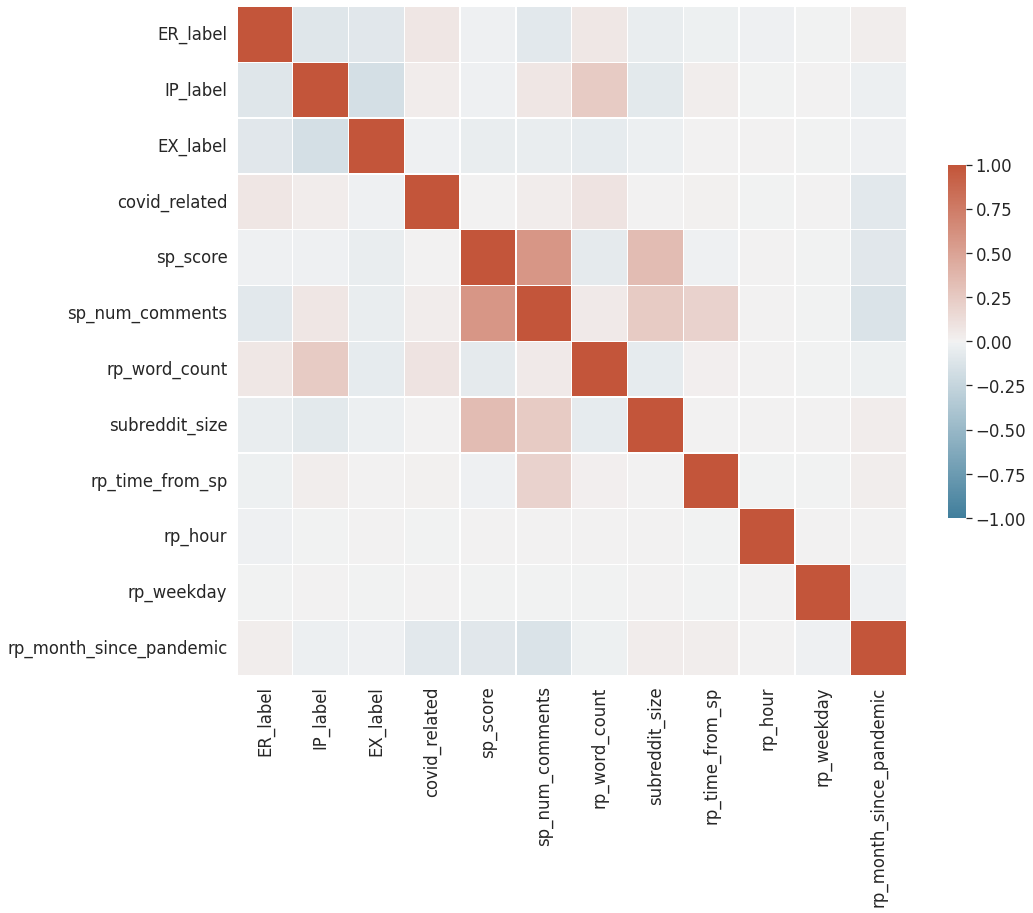

In [11]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
corr = df_reg[[ 'ER_label', 'IP_label', 'EX_label', 'covid_related',  'sp_score', 'sp_num_comments', 'rp_word_count', 'subreddit_size', 'rp_time_from_sp', 'rp_hour', 'rp_weekday', 'rp_month_since_pandemic' ]].corr()
# corr=df_reg.corr()
sns.set(font_scale = 1.5)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 13))
sns.heatmap(corr,  cmap=sns.diverging_palette(230, 20, as_cmap=True), vmax=1, vmin=-1, center=0, square=True, linewidth=.5, cbar_kws={"shrink": .5})
plt.savefig('corr.pdf')

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


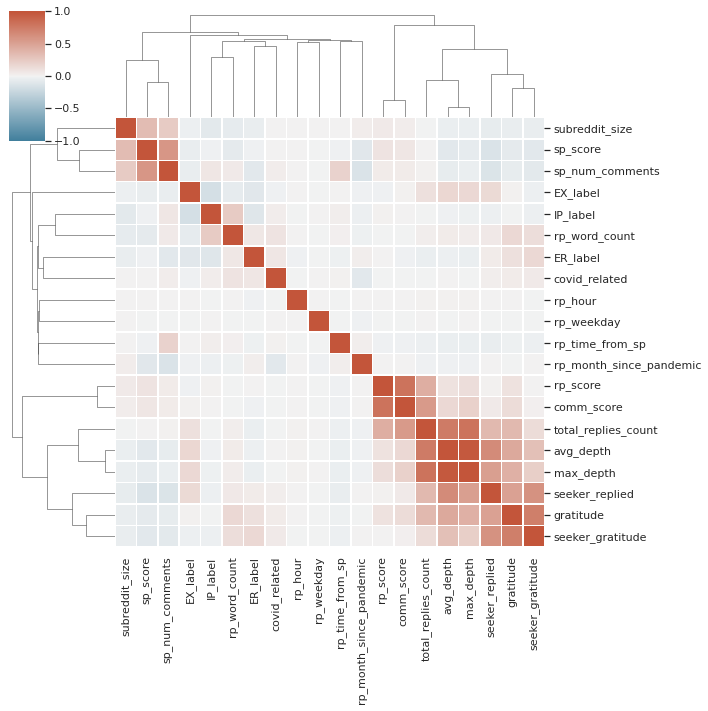

In [8]:
sns.clustermap(corr, cmap=sns.diverging_palette(230, 20, as_cmap=True), vmax=1, vmin=-1, center=0, square=True, linewidth=.5, cbar_kws={"shrink": .5},)

## Regression Analysis

In [ ]:
from statsmodels.formula.api import ols, logit, mixedlm
from statsmodels.stats.anova import anova_lm

In [ ]:
rp_score_mixed_m_control_independent = mixedlm('rp_score ~ sp_score_scaled + sp_num_comments_scaled + rp_word_count_scaled + subreddit_size_scaled + rp_time_from_sp_scaled + C(rp_hour) + C(rp_weekday) + C(rp_month_since_pandemic) + C(ER_label) * C(IP_label) * C(EX_label)', data=df_reg, groups=df_reg["covid_related"]).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/mixed_linear_model.py:2115: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [ ]:
rp_score_mixed_m_control_independent.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Mixed Linear Model Regression Results
================================================================================================
Model:                        MixedLM              Dependent Variable:             rp_score     
No. Observations:             227556               Method:                         REML         
No. Groups:                   2                    Scale:                          2170.2137    
Min. group size:              113737               Likelihood:                     -1196969.5318
Max. group size:              113819               Converged:                      Yes          
Mean group size:              113778.0                                                          
------------------------------------------------------------------------------------------------
                                                    Coef.   Std.Err.   z    P>|z|  [0.025 0.975]
------------------------------------------------------------------------------------------------
Intercept                                             2.325   32.947  0.071 0.944 -62.250 66.900
C(rp_hour)[T.1]                                       0.449    0.627  0.717 0.473  -0.779  1.677
C(rp_hour)[T.2]                                       1.035    0.621  1.667 0.095  -0.182  2.251
C(rp_hour)[T.3]                                       0.100    0.622  0.161 0.872  -1.119  1.319
C(rp_hour)[T.4]                                       0.698    0.630  1.108 0.268  -0.537  1.933
C(rp_hour)[T.5]                                       1.050    0.639  1.641 0.101  -0.204  2.303
C(rp_hour)[T.6]                                       0.224    0.655  0.342 0.733  -1.060  1.507
C(rp_hour)[T.7]                                      -0.401    0.679 -0.590 0.555  -1.732  0.930
C(rp_hour)[T.8]                                       0.417    0.704  0.592 0.554  -0.963  1.797
C(rp_hour)[T.9]                                      -0.494    0.729 -0.678 0.498  -1.922  0.934
C(rp_hour)[T.10]                                      0.638    0.737  0.865 0.387  -0.807  2.082
C(rp_hour)[T.11]                                      0.623    0.734  0.849 0.396  -0.816  2.062
C(rp_hour)[T.12]                                      0.877    0.714  1.228 0.219  -0.522  2.276
C(rp_hour)[T.13]                                      0.899    0.685  1.313 0.189  -0.443  2.241
C(rp_hour)[T.14]                                      1.796    0.666  2.696 0.007   0.491  3.102
C(rp_hour)[T.15]                                      2.672    0.651  4.103 0.000   1.396  3.949
C(rp_hour)[T.16]                                      0.513    0.644  0.797 0.426  -0.749  1.774
C(rp_hour)[T.17]                                      0.768    0.639  1.201 0.230  -0.485  2.021
C(rp_hour)[T.18]                                      1.286    0.635  2.024 0.043   0.041  2.531
C(rp_hour)[T.19]                                      1.028    0.635  1.620 0.105  -0.216  2.272
C(rp_hour)[T.20]                                      2.685    0.635  4.228 0.000   1.440  3.930
C(rp_hour)[T.21]                                      0.601    0.630  0.954 0.340  -0.634  1.835
C(rp_hour)[T.22]                                      0.214    0.628  0.341 0.733  -1.017  1.445
C(rp_hour)[T.23]                                      0.263    0.629  0.418 0.676  -0.970  1.496
C(rp_weekday)[T.1]                                    0.201    0.362  0.557 0.578  -0.508  0.910
C(rp_weekday)[T.2]                                   -0.409    0.361 -1.132 0.258  -1.117  0.299
C(rp_weekday)[T.3]                                    0.147    0.361  0.407 0.684  -0.560  0.854
C(rp_weekday)[T.4]                                    0.099    0.364  0.273 0.785  -0.614  0.813
C(rp_weekday)[T.5]                                   -0.381    0.368 -1.036 0.300  -1.103  0.340
C(rp_weekday)[T.6]                                   -0.143    0.363 -0.395 0.693  -0.855  0.568
C(rp

In [ ]:
rp_score_scaled_m_null = ols('rp_score ~ 1', data = df_reg).fit()
rp_score_scaled_m_control = ols('rp_score ~ sp_score_scaled + sp_num_comments_scaled + rp_word_count_scaled + subreddit_size_scaled + rp_time_from_sp_scaled + C(rp_hour) + C(rp_weekday) + C(rp_month_since_pandemic)', data = df_reg).fit()
rp_score_scaled_m_control_independent = ols('rp_score ~ sp_score_scaled + sp_num_comments_scaled + rp_word_count_scaled + subreddit_size_scaled + rp_time_from_sp_scaled + C(rp_hour) + C(rp_weekday) + C(rp_month_since_pandemic) + C(ER_label) * C(IP_label) * C(EX_label)', data = df_reg).fit()
rp_score_scaled_m_full = ols('rp_score ~ sp_score_scaled + sp_num_comments_scaled + rp_word_count_scaled + subreddit_size_scaled + rp_time_from_sp_scaled + C(rp_hour) + C(rp_weekday) + C(rp_month_since_pandemic) + C(ER_label) * C(IP_label) * C(EX_label) + covid_related', data = df_reg).fit()

In [ ]:
rp_score_scaled_m_null.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1657: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               rp_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Mon, 18 Apr 2022   Prob (F-statistic):                nan
Time:                        22:59:14   Log-Likelihood:            -1.1980e+06
No. Observations:              227556   AIC:                         2.396e+06
Df Residuals:                  227555   BIC:                         2.396e+06
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9309      0.098     50.260      0.000       4.739       5.123
==============================================================================
Omnibus:                   661442.324   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      44500862086.244
Skew:                          40.491   Prob(JB):                         0.00
Kurtosis:                    2167.921   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
rp_score_scaled_m_control.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               rp_score   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     43.07
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:59:21   Log-Likelihood:            -1.1970e+06
No. Observations:              227556   AIC:                         2.394e+06
Df Residuals:                  227506   BIC:                         2.395e+06
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            2.8064      0.615      4.566      0.000       1.602       4.011
C(rp_hour)[T.1]                      0.4384      0.627      0.699      0.484      -0.790       1.667
C(rp_hour)[T.2]                      1.0330      0.621      1.665      0.096      -0.183       2.249
C(rp_hour)[T.3]                      0.1038      0.622      0.167      0.868      -1.115       1.323
C(rp_hour)[T.4]                      0.6935      0.630      1.101      0.271      -0.541       1.928
C(rp_hour)[T.5]                      1.0483      0.639      1.639      0.101      -0.205       2.302
C(rp_hour)[T.6]                      0.2140      0.655      0.327      0.744      -1.070       1.498
C(rp_hour)[T.7]                     -0.4030      0.679     -0.594      0.553      -1.734       0.928
C(rp_hour)[T.8]                      0.4056      0.704      0.576      0.565      -0.974       1.786
C(rp_hour)[T.9]                     -0.5136      0.729     -0.705      0.481      -1.942       0.914
C(rp_hour)[T.10]                     0.6021      0.737      0.817      0.414      -0.843       2.047
C(rp_hour)[T.11]                     0.6015      0.734      0.819      0.413      -0.837       2.040
C(rp_hour)[T.12]                     0.8438      0.714      1.182      0.237      -0.555       2.243
C(rp_hour)[T.13]                     0.8700      0.685      1.271      0.204      -0.472       2.212
C(rp_hour)[T.14]                     1.7683      0.666      2.654      0.008       0.462       3.074
C(rp_hour)[T.15]                     2.6577      0.651      4.080      0.000       1.381       3.934
C(rp_hour)[T.16]                     0.4903      0.644      0.762      0.446      -0.771       1.752
C(rp_hour)[T.17]                     0.7639      0.639      1.195      0.232      -0.489       2.017
C(rp_hour)[T.18]                     1.2842      0.635      2.021      0.043       0.039       2.530
C(rp_hour)[T.19]                     1.0194      0.635      1.606      0.108      -0.225       2.263
C(rp_hour)[T.20]                     2.6729      0.635      4.208      0.000       1.428       3.918
C(rp_hour)[T.21]                     0.5940      0.630      0.943      0.346      -0.640       1.828
C(rp_hour)[T.22]                     0.2242      0.628      0.357      0.721      -1.007       1.456
C(rp_hour)[T.23]                     0.2491      0.629      0.396      0.692      -0.984       1.482
C(rp_weekday)[T.1]                   0.2085      0.362      0.576      0.564      -0.501       0.918
C(rp_weekday)[T.2]                  -0.4021      0.361     -1.113      0.266      -1.110       0.306
C(rp_weekday)[T.3]                   0.1517      0.361      0.420      0.674      -0.556       0.859
C(rp_weekday)[T.4]                   0.1092      0.36

In [ ]:
rp_score_scaled_m_control_independent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               rp_score   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     36.04
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:00:14   Log-Likelihood:            -1.1970e+06
No. Observations:              227556   AIC:                         2.394e+06
Df Residuals:                  227495   BIC:                         2.395e+06
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                              2.3098      0.643      3.594      0.000       1.050       3.570
C(rp_hour)[T.1]                                        0.4517      0.627      0.721      0.471      -0.776       1.680
C(rp_hour)[T.2]                                        1.0374      0.621      1.672      0.095      -0.179       2.254
C(rp_hour)[T.3]                                        0.1034      0.622      0.166      0.868      -1.116       1.322
C(rp_hour)[T.4]                                        0.7015      0.630      1.114      0.265      -0.533       1.936
C(rp_hour)[T.5]                                        1.0533      0.639      1.647      0.099      -0.200       2.307
C(rp_hour)[T.6]                                        0.2265      0.655      0.346      0.729      -1.057       1.510
C(rp_hour)[T.7]                                       -0.3942      0.679     -0.581      0.561      -1.725       0.937
C(rp_hour)[T.8]                                        0.4241      0.704      0.602      0.547      -0.956       1.804
C(rp_hour)[T.9]                                       -0.4853      0.729     -0.666      0.505      -1.913       0.943
C(rp_hour)[T.10]                                       0.6428      0.737      0.872      0.383      -0.802       2.088
C(rp_hour)[T.11]                                       0.6261      0.734      0.853      0.394      -0.813       2.065
C(rp_hour)[T.12]                                       0.8808      0.714      1.234      0.217      -0.518       2.280
C(rp_hour)[T.13]                                       0.9039      0.685      1.320      0.187      -0.438       2.246
C(rp_hour)[T.14]                                       1.8029      0.666      2.706      0.007       0.497       3.109
C(rp_hour)[T.15]                                       2.6793      0.651      4.114      0.000       1.403       3.956
C(rp_hour)[T.16]                                       0.5221      0.644      0.811      0.417      -0.739       1.784
C(rp_hour)[T.17]                                       0.7760      0.639      1.214      0.225      -0.477       2.029
C(rp_hour)[T.18]                                       1.2932      0.635      2.035      0.042       0.048       2.539
C(rp_hour)[T.19]                                       1.0307      0.635      1.624      0.104      -0.213       2.275
C(rp_hour)[T.20]                                       2.6867      0.635      4.230      0.000       1.442       3.932
C(rp_hour)[T.21]                                       0.6043      0.630      0.960      0.337      -0.630       1.839
C(rp_hour)[T.22]                                       0.2198      0.628      0.350      0.726      -1.011  

In [ ]:
rp_score_scaled_m_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               rp_score   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     35.50
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:00:15   Log-Likelihood:            -1.1970e+06
No. Observations:              227556   AIC:                         2.394e+06
Df Residuals:                  227494   BIC:                         2.395e+06
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                              2.4900      0.652      3.820      0.000       1.212       3.767
C(rp_hour)[T.1]                                        0.4493      0.627      0.717      0.473      -0.779       1.677
C(rp_hour)[T.2]                                        1.0346      0.621      1.667      0.095      -0.182       2.251
C(rp_hour)[T.3]                                        0.1000      0.622      0.161      0.872      -1.119       1.319
C(rp_hour)[T.4]                                        0.6981      0.630      1.108      0.268      -0.537       1.933
C(rp_hour)[T.5]                                        1.0495      0.639      1.641      0.101      -0.204       2.303
C(rp_hour)[T.6]                                        0.2237      0.655      0.342      0.733      -1.060       1.507
C(rp_hour)[T.7]                                       -0.4008      0.679     -0.590      0.555      -1.732       0.930
C(rp_hour)[T.8]                                        0.4166      0.704      0.592      0.554      -0.963       1.797
C(rp_hour)[T.9]                                       -0.4938      0.729     -0.678      0.498      -1.922       0.934
C(rp_hour)[T.10]                                       0.6375      0.737      0.865      0.387      -0.807       2.082
C(rp_hour)[T.11]                                       0.6229      0.734      0.849      0.396      -0.816       2.062
C(rp_hour)[T.12]                                       0.8768      0.714      1.228      0.219      -0.522       2.276
C(rp_hour)[T.13]                                       0.8989      0.685      1.313      0.189      -0.443       2.241
C(rp_hour)[T.14]                                       1.7965      0.666      2.696      0.007       0.491       3.102
C(rp_hour)[T.15]                                       2.6724      0.651      4.103      0.000       1.396       3.949
C(rp_hour)[T.16]                                       0.5128      0.644      0.797      0.426      -0.749       1.774
C(rp_hour)[T.17]                                       0.7679      0.639      1.201      0.230      -0.485       2.021
C(rp_hour)[T.18]                                       1.2860      0.635      2.024      0.043       0.041       2.531
C(rp_hour)[T.19]                                       1.0283      0.635      1.620      0.105      -0.216       2.272
C(rp_hour)[T.20]                                       2.6851      0.635      4.228      0.000       1.440       3.930
C(rp_hour)[T.21]                                       0.6006      0.630      0.954      0.340      -0.634       1.835
C(rp_hour)[T.22]                                       0.2140      0.628      0.341      0.733      -1.017  

In [ ]:
rp_score_m_null = ols('rp_score ~ 1', data = df_reg).fit()
rp_score_m_control = ols('rp_score ~ sp_score + sp_num_comments + rp_word_count + subreddit_size + rp_time_from_sp + C(rp_hour) + C(rp_weekday) + C(rp_month_since_pandemic)', data = df_reg).fit()
rp_score_m_control_independent = ols('rp_score ~ sp_score + sp_num_comments + rp_word_count + subreddit_size + rp_time_from_sp + C(rp_hour) + C(rp_weekday) + C(rp_month_since_pandemic) + C(ER_label) * C(IP_label) * C(EX_label)', data = df_reg).fit()
rp_score_m_full = ols('rp_score ~ sp_score + sp_num_comments + rp_word_count + subreddit_size + rp_time_from_sp + C(rp_hour) + C(rp_weekday) + C(rp_month_since_pandemic) + C(ER_label) * C(IP_label) * C(EX_label) + covid_related', data = df_reg).fit()

In [ ]:
rp_score_m_control.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               rp_score   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     43.07
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        21:14:50   Log-Likelihood:            -1.1970e+06
No. Observations:              227556   AIC:                         2.394e+06
Df Residuals:                  227506   BIC:                         2.395e+06
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.2893      0.627      0.461      0.645      -0.940       1.518
C(rp_hour)[T.1]                      0.4384      0.627      0.699      0.484      -0.790       1.667
C(rp_hour)[T.2]                      1.0330      0.621      1.665      0.096      -0.183       2.249
C(rp_hour)[T.3]                      0.1038      0.622      0.167      0.868      -1.115       1.323
C(rp_hour)[T.4]                      0.6935      0.630      1.101      0.271      -0.541       1.928
C(rp_hour)[T.5]                      1.0483      0.639      1.639      0.101      -0.205       2.302
C(rp_hour)[T.6]                      0.2140      0.655      0.327      0.744      -1.070       1.498
C(rp_hour)[T.7]                     -0.4030      0.679     -0.594      0.553      -1.734       0.928
C(rp_hour)[T.8]                      0.4056      0.704      0.576      0.565      -0.974       1.786
C(rp_hour)[T.9]                     -0.5136      0.729     -0.705      0.481      -1.942       0.914
C(rp_hour)[T.10]                     0.6021      0.737      0.817      0.414      -0.843       2.047
C(rp_hour)[T.11]                     0.6015      0.734      0.819      0.413      -0.837       2.040
C(rp_hour)[T.12]                     0.8438      0.714      1.182      0.237      -0.555       2.243
C(rp_hour)[T.13]                     0.8700      0.685      1.271      0.204      -0.472       2.212
C(rp_hour)[T.14]                     1.7683      0.666      2.654      0.008       0.462       3.074
C(rp_hour)[T.15]                     2.6577      0.651      4.080      0.000       1.381       3.934
C(rp_hour)[T.16]                     0.4903      0.644      0.762      0.446      -0.771       1.752
C(rp_hour)[T.17]                     0.7639      0.639      1.195      0.232      -0.489       2.017
C(rp_hour)[T.18]                     1.2842      0.635      2.021      0.043       0.039       2.530
C(rp_hour)[T.19]                     1.0194      0.635      1.606      0.108      -0.225       2.263
C(rp_hour)[T.20]                     2.6729      0.635      4.208      0.000       1.428       3.918
C(rp_hour)[T.21]                     0.5940      0.630      0.943      0.346      -0.640       1.828
C(rp_hour)[T.22]                     0.2242      0.628      0.357      0.721      -1.007       1.456
C(rp_hour)[T.23]                     0.2491      0.629      0.396      0.692      -0.984       1.482
C(rp_weekday)[T.1]                   0.2085      0.362      0.576      0.564      -0.501       0.918
C(rp_weekday)[T.2]                  -0.4021      0.361     -1.113      0.266      -1.110       0.306
C(rp_weekday)[T.3]                   0.1517      0.361      0.420      0.674      -0.556       0.859
C(rp_weekday)[T.4]                   0.1092      0.36

In [ ]:
rp_score_m_control_independent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               rp_score   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     36.04
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        21:14:58   Log-Likelihood:            -1.1970e+06
No. Observations:              227556   AIC:                         2.394e+06
Df Residuals:                  227495   BIC:                         2.395e+06
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                             -0.1364      0.653     -0.209      0.834      -1.416       1.143
C(rp_hour)[T.1]                                        0.4517      0.627      0.721      0.471      -0.776       1.680
C(rp_hour)[T.2]                                        1.0374      0.621      1.672      0.095      -0.179       2.254
C(rp_hour)[T.3]                                        0.1034      0.622      0.166      0.868      -1.116       1.322
C(rp_hour)[T.4]                                        0.7015      0.630      1.114      0.265      -0.533       1.936
C(rp_hour)[T.5]                                        1.0533      0.639      1.647      0.099      -0.200       2.307
C(rp_hour)[T.6]                                        0.2265      0.655      0.346      0.729      -1.057       1.510
C(rp_hour)[T.7]                                       -0.3942      0.679     -0.581      0.561      -1.725       0.937
C(rp_hour)[T.8]                                        0.4241      0.704      0.602      0.547      -0.956       1.804
C(rp_hour)[T.9]                                       -0.4853      0.729     -0.666      0.505      -1.913       0.943
C(rp_hour)[T.10]                                       0.6428      0.737      0.872      0.383      -0.802       2.088
C(rp_hour)[T.11]                                       0.6261      0.734      0.853      0.394      -0.813       2.065
C(rp_hour)[T.12]                                       0.8808      0.714      1.234      0.217      -0.518       2.280
C(rp_hour)[T.13]                                       0.9039      0.685      1.320      0.187      -0.438       2.246
C(rp_hour)[T.14]                                       1.8029      0.666      2.706      0.007       0.497       3.109
C(rp_hour)[T.15]                                       2.6793      0.651      4.114      0.000       1.403       3.956
C(rp_hour)[T.16]                                       0.5221      0.644      0.811      0.417      -0.739       1.784
C(rp_hour)[T.17]                                       0.7760      0.639      1.214      0.225      -0.477       2.029
C(rp_hour)[T.18]                                       1.2932      0.635      2.035      0.042       0.048       2.539
C(rp_hour)[T.19]                                       1.0307      0.635      1.624      0.104      -0.213       2.275
C(rp_hour)[T.20]                                       2.6867      0.635      4.230      0.000       1.442       3.932
C(rp_hour)[T.21]                                       0.6043      0.630      0.960      0.337      -0.630       1.839
C(rp_hour)[T.22]                                       0.2198      0.628      0.350      0.726      -1.011  

In [ ]:
anova_lm(rp_score_m_null, rp_score_m_control, rp_score_m_control_independent, rp_score_m_full)

df_resid           ssr  df_diff       ss_diff          F        Pr(>F)
0  227555.0  4.984117e+08      0.0           NaN        NaN           NaN
1  227506.0  4.938312e+08     49.0  4.580540e+06  43.074096  0.000000e+00
2  227495.0  4.937188e+08     11.0  1.124239e+05   4.709355  2.965970e-07
3  227494.0  4.937128e+08      1.0  6.017982e+03   2.772978  9.586902e-02

In [ ]:
# replied_m_null = logit('seeker_replied ~ 1', data = df_reg).fit()
# replied_m_control = logit('seeker_replied ~ sp_score + sp_num_comments + rp_word_count + subreddit_size + rp_time_from_sp + C(rp_hour) + C(rp_weekday) + C(rp_month_since_pandemic)', data = df_reg).fit()
# replied_m_control_independent = logit('seeker_replied ~ sp_score + sp_num_comments + rp_word_count + subreddit_size + rp_time_from_sp + C(rp_hour) + C(rp_weekday) + C(rp_month_since_pandemic) + C(ER_label) * C(IP_label) * C(EX_label)', data = df_reg).fit()
# replied_m_full = logit('seeker_replied ~ sp_score + sp_num_comments + rp_word_count + subreddit_size + rp_time_from_sp + C(rp_hour) + C(rp_weekday) + C(rp_month_since_pandemic) + C(ER_label) * C(IP_label) * C(EX_label) + covid_related', data = df_reg).fit()

Optimization terminated successfully.
         Current function value: 0.582956
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.563088
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.551881
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.551684
         Iterations 7


In [ ]:
replied_m_scaled_null = logit('seeker_replied ~ 1', data = df_reg).fit()
replied_m_scaled_control = logit('seeker_replied ~ sp_score_scaled + sp_num_comments_scaled + rp_word_count_scaled + subreddit_size_scaled + rp_time_from_sp_scaled + C(rp_hour) + C(rp_weekday) + C(rp_month_since_pandemic)', data = df_reg).fit()
replied_m_scaled_control_independent = logit('seeker_replied ~ sp_score_scaled + sp_num_comments_scaled + rp_word_count_scaled + subreddit_size_scaled + rp_time_from_sp_scaled + C(rp_hour) + C(rp_weekday) + C(rp_month_since_pandemic) + C(ER_label) * C(IP_label) * C(EX_label)', data = df_reg).fit()
replied_m_scaled_full = logit('seeker_replied ~ sp_score_scaled + sp_num_comments_scaled + rp_word_count_scaled + subreddit_size_scaled + rp_time_from_sp_scaled + C(rp_hour) + C(rp_weekday) + C(rp_month_since_pandemic) + C(ER_label) * C(IP_label) * C(EX_label) + covid_related', data = df_reg).fit()

Optimization terminated successfully.
         Current function value: 0.582956
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.563088
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.551881
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.551684
         Iterations 8


In [ ]:
replied_m_scaled_null.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         seeker_replied   No. Observations:               227556
Model:                          Logit   Df Residuals:                   227555
Method:                           MLE   Df Model:                            0
Date:                Mon, 18 Apr 2022   Pseudo R-squ.:               9.160e-11
Time:                        23:08:13   Log-Likelihood:            -1.3266e+05
converged:                       True   LL-Null:                   -1.3266e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9962      0.005   -210.894      0.000      -1.005      -0.987
==============================================================================
"""

In [ ]:
replied_m_scaled_control.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         seeker_replied   No. Observations:               227556
Model:                          Logit   Df Residuals:                   227506
Method:                           MLE   Df Model:                           49
Date:                Mon, 18 Apr 2022   Pseudo R-squ.:                 0.03408
Time:                        23:08:18   Log-Likelihood:            -1.2813e+05
converged:                       True   LL-Null:                   -1.3266e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -0.9831      0.030    -32.531      0.000      -1.042      -0.924
C(rp_hour)[T.1]                     -0.0520      0.030     -1.714      0.087      -0.112       0.007
C(rp_hour)[T.2]                     -0.0747      0.030     -2.480      0.013      -0.134      -0.016
C(rp_hour)[T.3]                     -0.1003      0.030     -3.313      0.001      -0.160      -0.041
C(rp_hour)[T.4]                     -0.0968      0.031     -3.157      0.002      -0.157      -0.037
C(rp_hour)[T.5]                     -0.1481      0.031     -4.740      0.000      -0.209      -0.087
C(rp_hour)[T.6]                     -0.1436      0.032     -4.485      0.000      -0.206      -0.081
C(rp_hour)[T.7]                     -0.1818      0.033     -5.447      0.000      -0.247      -0.116
C(rp_hour)[T.8]                     -0.1515      0.035     -4.392      0.000      -0.219      -0.084
C(rp_hour)[T.9]                     -0.1480      0.036     -4.137      0.000      -0.218      -0.078
C(rp_hour)[T.10]                    -0.1744      0.036     -4.800      0.000      -0.246      -0.103
C(rp_hour)[T.11]                    -0.1946      0.036     -5.335      0.000      -0.266      -0.123
C(rp_hour)[T.12]                    -0.1458      0.035     -4.141      0.000      -0.215      -0.077
C(rp_hour)[T.13]                    -0.1198      0.034     -3.559      0.000      -0.186      -0.054
C(rp_hour)[T.14]                    -0.0740      0.033     -2.278      0.023      -0.138      -0.010
C(rp_hour)[T.15]                    -0.0586      0.032     -1.852      0.064      -0.121       0.003
C(rp_hour)[T.16]                    -0.0577      0.031     -1.846      0.065      -0.119       0.004
C(rp_hour)[T.17]                    -0.1223      0.031     -3.908      0.000      -0.184      -0.061
C(rp_hour)[T.18]                    -0.1138      0.031     -3.669      0.000      -0.175      -0.053
C(rp_hour)[T.19]                    -0.0887      0.031     -2.867      0.004      -0.149      -0.028
C(rp_hour)[T.20]                    -0.0770      0.031     -2.492      0.013      -0.138      -0.016
C(rp_hour)[T.21]                    -0.0343      0.031     -1.125      0.260      -0.094       0.025
C(rp_hour)[T.22]                    -0.0428      0.030     -1.405      0.160      -0.103       0.017
C(rp_hour)[T.23]                    -0.0466      0.030     -1.528      0.127      -0.106       0.013
C(rp_weekday)[T.1]                  -0.0159      0.018     -0.900      0.368      -0.051       0.019
C(rp_weekday)[T.2]                  -0.0261      0.018     -1.471      0.141      -0.061       0.009
C(rp_weekday)[T.3]                  -0.0050      0.018     -0.284      0.777      -0.040       0.030
C(rp_weekday)[T.4]                  -0.0117      0.018     -0.659      0.510      -0.047       0.023
C(rp_weekday)[T.5]                   0.0126      0.018      0.698      0.485      -0.023       0.048
C(rp_week

In [ ]:
replied_m_scaled_control_independent.llr

14142.730340071808

In [ ]:
replied_m_scaled_control_independent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         seeker_replied   No. Observations:               227556
Model:                          Logit   Df Residuals:                   227495
Method:                           MLE   Df Model:                           60
Date:                Mon, 18 Apr 2022   Pseudo R-squ.:                 0.05331
Time:                        23:08:31   Log-Likelihood:            -1.2558e+05
converged:                       True   LL-Null:                   -1.3266e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                             -1.1629      0.032    -36.145      0.000      -1.226      -1.100
C(rp_hour)[T.1]                                       -0.0586      0.031     -1.904      0.057      -0.119       0.002
C(rp_hour)[T.2]                                       -0.0838      0.031     -2.746      0.006      -0.144      -0.024
C(rp_hour)[T.3]                                       -0.1066      0.031     -3.477      0.001      -0.167      -0.047
C(rp_hour)[T.4]                                       -0.1013      0.031     -3.261      0.001      -0.162      -0.040
C(rp_hour)[T.5]                                       -0.1544      0.032     -4.880      0.000      -0.216      -0.092
C(rp_hour)[T.6]                                       -0.1564      0.032     -4.824      0.000      -0.220      -0.093
C(rp_hour)[T.7]                                       -0.1923      0.034     -5.688      0.000      -0.259      -0.126
C(rp_hour)[T.8]                                       -0.1578      0.035     -4.515      0.000      -0.226      -0.089
C(rp_hour)[T.9]                                       -0.1534      0.036     -4.234      0.000      -0.224      -0.082
C(rp_hour)[T.10]                                      -0.1837      0.037     -4.987      0.000      -0.256      -0.111
C(rp_hour)[T.11]                                      -0.2004      0.037     -5.424      0.000      -0.273      -0.128
C(rp_hour)[T.12]                                      -0.1556      0.036     -4.363      0.000      -0.226      -0.086
C(rp_hour)[T.13]                                      -0.1283      0.034     -3.760      0.000      -0.195      -0.061
C(rp_hour)[T.14]                                      -0.0901      0.033     -2.735      0.006      -0.155      -0.026
C(rp_hour)[T.15]                                      -0.0616      0.032     -1.920      0.055      -0.124       0.001
C(rp_hour)[T.16]                                      -0.0596      0.032     -1.883      0.060      -0.122       0.002
C(rp_hour)[T.17]                                      -0.1213      0.032     -3.825      0.000      -0.183      -0.059
C(rp_hour)[T.18]                                      -0.1223      0.031     -3.895      0.000      -0.184      -0.061
C(rp_hour)[T.19]                                      -0.0922      0.031     -2.944      0.003      -0.154      -0.031
C(rp_hour)[T.20]                                      -0.0860      0.031     -2.746      0.006      -0.147      -0.025
C(rp_hour)[T.21]                                      -0.0394      0.031     -1.275      0.202      -0.100       0.021
C(rp_hour)[T.22]                                      -0.0451      0.031     -1.461      0.144      -0.106       0.015
C(rp_hour)[T.23]                                      -0.0519      0.031     -1.681      0.093      -0.112       0.009
C(rp_weekday)[T.1]          

In [ ]:
replied_m_scaled_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         seeker_replied   No. Observations:               227556
Model:                          Logit   Df Residuals:                   227494
Method:                           MLE   Df Model:                           61
Date:                Mon, 18 Apr 2022   Pseudo R-squ.:                 0.05364
Time:                        23:08:37   Log-Likelihood:            -1.2554e+05
converged:                       True   LL-Null:                   -1.3266e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                             -1.2106      0.033    -37.157      0.000      -1.274      -1.147
C(rp_hour)[T.1]                                       -0.0582      0.031     -1.892      0.059      -0.118       0.002
C(rp_hour)[T.2]                                       -0.0836      0.031     -2.740      0.006      -0.143      -0.024
C(rp_hour)[T.3]                                       -0.1061      0.031     -3.460      0.001      -0.166      -0.046
C(rp_hour)[T.4]                                       -0.1010      0.031     -3.251      0.001      -0.162      -0.040
C(rp_hour)[T.5]                                       -0.1541      0.032     -4.867      0.000      -0.216      -0.092
C(rp_hour)[T.6]                                       -0.1562      0.032     -4.814      0.000      -0.220      -0.093
C(rp_hour)[T.7]                                       -0.1908      0.034     -5.644      0.000      -0.257      -0.125
C(rp_hour)[T.8]                                       -0.1564      0.035     -4.472      0.000      -0.225      -0.088
C(rp_hour)[T.9]                                       -0.1514      0.036     -4.178      0.000      -0.222      -0.080
C(rp_hour)[T.10]                                      -0.1827      0.037     -4.961      0.000      -0.255      -0.111
C(rp_hour)[T.11]                                      -0.1997      0.037     -5.405      0.000      -0.272      -0.127
C(rp_hour)[T.12]                                      -0.1551      0.036     -4.347      0.000      -0.225      -0.085
C(rp_hour)[T.13]                                      -0.1274      0.034     -3.733      0.000      -0.194      -0.061
C(rp_hour)[T.14]                                      -0.0891      0.033     -2.703      0.007      -0.154      -0.024
C(rp_hour)[T.15]                                      -0.0607      0.032     -1.893      0.058      -0.124       0.002
C(rp_hour)[T.16]                                      -0.0583      0.032     -1.840      0.066      -0.120       0.004
C(rp_hour)[T.17]                                      -0.1205      0.032     -3.800      0.000      -0.183      -0.058
C(rp_hour)[T.18]                                      -0.1216      0.031     -3.871      0.000      -0.183      -0.060
C(rp_hour)[T.19]                                      -0.0927      0.031     -2.957      0.003      -0.154      -0.031
C(rp_hour)[T.20]                                      -0.0862      0.031     -2.754      0.006      -0.148      -0.025
C(rp_hour)[T.21]                                      -0.0388      0.031     -1.253      0.210      -0.099       0.022
C(rp_hour)[T.22]                                      -0.0441      0.031     -1.427      0.154      -0.105       0.016
C(rp_hour)[T.23]                                      -0.0517      0.031     -1.673      0.094      -0.112       0.009
C(rp_weekday)[T.1]          

In [ ]:
replied_m_null.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         seeker_replied   No. Observations:               227556
Model:                          Logit   Df Residuals:                   227555
Method:                           MLE   Df Model:                            0
Date:                Mon, 18 Apr 2022   Pseudo R-squ.:               9.160e-11
Time:                        20:29:35   Log-Likelihood:            -1.3266e+05
converged:                       True   LL-Null:                   -1.3266e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9962      0.005   -210.894      0.000      -1.005      -0.987
==============================================================================
"""

In [ ]:
replied_m_control.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         seeker_replied   No. Observations:               227556
Model:                          Logit   Df Residuals:                   227506
Method:                           MLE   Df Model:                           49
Date:                Mon, 18 Apr 2022   Pseudo R-squ.:                 0.03408
Time:                        20:29:45   Log-Likelihood:            -1.2813e+05
converged:                       True   LL-Null:                   -1.3266e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -0.8011      0.031    -26.206      0.000      -0.861      -0.741
C(rp_hour)[T.1]                     -0.0520      0.030     -1.714      0.087      -0.112       0.007
C(rp_hour)[T.2]                     -0.0747      0.030     -2.480      0.013      -0.134      -0.016
C(rp_hour)[T.3]                     -0.1003      0.030     -3.313      0.001      -0.160      -0.041
C(rp_hour)[T.4]                     -0.0968      0.031     -3.157      0.002      -0.157      -0.037
C(rp_hour)[T.5]                     -0.1481      0.031     -4.740      0.000      -0.209      -0.087
C(rp_hour)[T.6]                     -0.1436      0.032     -4.485      0.000      -0.206      -0.081
C(rp_hour)[T.7]                     -0.1818      0.033     -5.447      0.000      -0.247      -0.116
C(rp_hour)[T.8]                     -0.1515      0.035     -4.392      0.000      -0.219      -0.084
C(rp_hour)[T.9]                     -0.1480      0.036     -4.137      0.000      -0.218      -0.078
C(rp_hour)[T.10]                    -0.1744      0.036     -4.800      0.000      -0.246      -0.103
C(rp_hour)[T.11]                    -0.1946      0.036     -5.335      0.000      -0.266      -0.123
C(rp_hour)[T.12]                    -0.1458      0.035     -4.141      0.000      -0.215      -0.077
C(rp_hour)[T.13]                    -0.1198      0.034     -3.559      0.000      -0.186      -0.054
C(rp_hour)[T.14]                    -0.0740      0.033     -2.278      0.023      -0.138      -0.010
C(rp_hour)[T.15]                    -0.0586      0.032     -1.852      0.064      -0.121       0.003
C(rp_hour)[T.16]                    -0.0577      0.031     -1.846      0.065      -0.119       0.004
C(rp_hour)[T.17]                    -0.1223      0.031     -3.908      0.000      -0.184      -0.061
C(rp_hour)[T.18]                    -0.1138      0.031     -3.669      0.000      -0.175      -0.053
C(rp_hour)[T.19]                    -0.0887      0.031     -2.867      0.004      -0.149      -0.028
C(rp_hour)[T.20]                    -0.0770      0.031     -2.492      0.013      -0.138      -0.016
C(rp_hour)[T.21]                    -0.0343      0.031     -1.125      0.260      -0.094       0.025
C(rp_hour)[T.22]                    -0.0428      0.030     -1.405      0.160      -0.103       0.017
C(rp_hour)[T.23]                    -0.0466      0.030     -1.528      0.127      -0.106       0.013
C(rp_weekday)[T.1]                  -0.0159      0.018     -0.900      0.368      -0.051       0.019
C(rp_weekday)[T.2]                  -0.0261      0.018     -1.471      0.141      -0.061       0.009
C(rp_weekday)[T.3]                  -0.0050      0.018     -0.284      0.777      -0.040       0.030
C(rp_weekday)[T.4]                  -0.0117      0.018     -0.659      0.510      -0.047       0.023
C(rp_weekday)[T.5]                   0.0126      0.018      0.698      0.485      -0.023       0.048
C(rp_week

In [ ]:
replied_m_control_independent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         seeker_replied   No. Observations:               227556
Model:                          Logit   Df Residuals:                   227495
Method:                           MLE   Df Model:                           60
Date:                Mon, 18 Apr 2022   Pseudo R-squ.:                 0.05331
Time:                        20:46:14   Log-Likelihood:            -1.2558e+05
converged:                       True   LL-Null:                   -1.3266e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                             -1.0130      0.032    -31.232      0.000      -1.077      -0.949
C(rp_hour)[T.1]                                       -0.0586      0.031     -1.904      0.057      -0.119       0.002
C(rp_hour)[T.2]                                       -0.0838      0.031     -2.746      0.006      -0.144      -0.024
C(rp_hour)[T.3]                                       -0.1066      0.031     -3.477      0.001      -0.167      -0.047
C(rp_hour)[T.4]                                       -0.1013      0.031     -3.261      0.001      -0.162      -0.040
C(rp_hour)[T.5]                                       -0.1544      0.032     -4.880      0.000      -0.216      -0.092
C(rp_hour)[T.6]                                       -0.1564      0.032     -4.824      0.000      -0.220      -0.093
C(rp_hour)[T.7]                                       -0.1923      0.034     -5.688      0.000      -0.259      -0.126
C(rp_hour)[T.8]                                       -0.1578      0.035     -4.515      0.000      -0.226      -0.089
C(rp_hour)[T.9]                                       -0.1534      0.036     -4.234      0.000      -0.224      -0.082
C(rp_hour)[T.10]                                      -0.1837      0.037     -4.987      0.000      -0.256      -0.111
C(rp_hour)[T.11]                                      -0.2004      0.037     -5.424      0.000      -0.273      -0.128
C(rp_hour)[T.12]                                      -0.1556      0.036     -4.363      0.000      -0.226      -0.086
C(rp_hour)[T.13]                                      -0.1283      0.034     -3.760      0.000      -0.195      -0.061
C(rp_hour)[T.14]                                      -0.0901      0.033     -2.735      0.006      -0.155      -0.026
C(rp_hour)[T.15]                                      -0.0616      0.032     -1.920      0.055      -0.124       0.001
C(rp_hour)[T.16]                                      -0.0596      0.032     -1.883      0.060      -0.122       0.002
C(rp_hour)[T.17]                                      -0.1213      0.032     -3.825      0.000      -0.183      -0.059
C(rp_hour)[T.18]                                      -0.1223      0.031     -3.895      0.000      -0.184      -0.061
C(rp_hour)[T.19]                                      -0.0922      0.031     -2.944      0.003      -0.154      -0.031
C(rp_hour)[T.20]                                      -0.0860      0.031     -2.746      0.006      -0.147      -0.025
C(rp_hour)[T.21]                                      -0.0394      0.031     -1.275      0.202      -0.100       0.021
C(rp_hour)[T.22]                                      -0.0451      0.031     -1.461      0.144      -0.106       0.015
C(rp_hour)[T.23]                                      -0.0519      0.031     -1.681      0.093      -0.112       0.009
C(rp_weekday)[T.1]          

In [ ]:
replied_m_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         seeker_replied   No. Observations:               227556
Model:                          Logit   Df Residuals:                   227494
Method:                           MLE   Df Model:                           61
Date:                Mon, 18 Apr 2022   Pseudo R-squ.:                 0.05364
Time:                        21:16:56   Log-Likelihood:            -1.2554e+05
converged:                       True   LL-Null:                   -1.3266e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                             -1.0576      0.033    -32.258      0.000      -1.122      -0.993
C(rp_hour)[T.1]                                       -0.0582      0.031     -1.892      0.059      -0.118       0.002
C(rp_hour)[T.2]                                       -0.0836      0.031     -2.740      0.006      -0.143      -0.024
C(rp_hour)[T.3]                                       -0.1061      0.031     -3.460      0.001      -0.166      -0.046
C(rp_hour)[T.4]                                       -0.1010      0.031     -3.251      0.001      -0.162      -0.040
C(rp_hour)[T.5]                                       -0.1541      0.032     -4.867      0.000      -0.216      -0.092
C(rp_hour)[T.6]                                       -0.1562      0.032     -4.814      0.000      -0.220      -0.093
C(rp_hour)[T.7]                                       -0.1908      0.034     -5.644      0.000      -0.257      -0.125
C(rp_hour)[T.8]                                       -0.1564      0.035     -4.472      0.000      -0.225      -0.088
C(rp_hour)[T.9]                                       -0.1514      0.036     -4.178      0.000      -0.222      -0.080
C(rp_hour)[T.10]                                      -0.1827      0.037     -4.961      0.000      -0.255      -0.111
C(rp_hour)[T.11]                                      -0.1997      0.037     -5.405      0.000      -0.272      -0.127
C(rp_hour)[T.12]                                      -0.1551      0.036     -4.347      0.000      -0.225      -0.085
C(rp_hour)[T.13]                                      -0.1274      0.034     -3.733      0.000      -0.194      -0.061
C(rp_hour)[T.14]                                      -0.0891      0.033     -2.703      0.007      -0.154      -0.024
C(rp_hour)[T.15]                                      -0.0607      0.032     -1.893      0.058      -0.124       0.002
C(rp_hour)[T.16]                                      -0.0583      0.032     -1.840      0.066      -0.120       0.004
C(rp_hour)[T.17]                                      -0.1205      0.032     -3.800      0.000      -0.183      -0.058
C(rp_hour)[T.18]                                      -0.1216      0.031     -3.871      0.000      -0.183      -0.060
C(rp_hour)[T.19]                                      -0.0927      0.031     -2.957      0.003      -0.154      -0.031
C(rp_hour)[T.20]                                      -0.0862      0.031     -2.754      0.006      -0.148      -0.025
C(rp_hour)[T.21]                                      -0.0388      0.031     -1.253      0.210      -0.099       0.022
C(rp_hour)[T.22]                                      -0.0441      0.031     -1.427      0.154      -0.105       0.016
C(rp_hour)[T.23]                                      -0.0517      0.031     -1.673      0.094      -0.112       0.009
C(rp_weekday)[T.1]          

In [ ]:
anova_lm(replied_m_null, replied_m_control, replied_m_control_independent, replied_m_full)

AttributeError: ignored

In [ ]:
df[['ER_label', 'IP_label', 'EX_label', 'covid_related']].groupby('covid_related').apply(lambda x: x.value_counts())

covid_related  ER_label  IP_label  EX_label  covid_related
False          0         2         0         False            27302
                         0         0         False            26691
               1         0         0         False            24259
                         2         0         False            13741
               2         0         0         False             7026
               0         0         2         False             6217
               2         2         0         False             3932
               1         0         2         False             1936
               0         2         2         False             1027
               2         0         2         False              591
               1         2         2         False              516
               2         2         2         False              143
True           0         2         0         True             25813
               1         0         0         True        

In [ ]:
empathy_df = pd.melt(df[['rp_id', 'rp_time', 'subreddit', 'ER_label', 'IP_label', 'EX_label', 'covid_related']], id_vars=['rp_id', 'rp_time', 'covid_related', 'subreddit'], value_vars=['ER_label', 'IP_label', 'EX_label'], var_name='empathy_type', value_name='empathy_level')
empathy_df

rp_id    rp_time  covid_related   subreddit empathy_type  \
0       gyvzhu5 2021-05-01           True     therapy     ER_label   
1       ft9f1vl 2020-06-01          False  helpmecope     ER_label   
2       flj6ik8 2020-03-01          False  depression     ER_label   
3       frtmrd2 2020-05-01          False  depression     ER_label   
4       gw3iy9r 2021-04-01          False  offmychest     ER_label   
...         ...        ...            ...         ...          ...   
680281  flqkpe3 2020-03-01          False  depression     EX_label   
680282  g8c6me4 2020-10-01          False  depression     EX_label   
680283  fpbyo66 2020-05-01           True  depression     EX_label   
680284  gt8wf0u 2021-04-01          False  offmychest     EX_label   
680285  fyzm293 2020-07-01           True  depression     EX_label   

        empathy_level  
0                   1  
1                   2  
2                   0  
3                   0  
4                   2  
...               ...  
680281              0  
680282              0  
680283              0  
680284              0  
680285              0  

[680286 rows x 6 columns]

In [ ]:
freq_view = empathy_df.groupby(['empathy_type', 'covid_related', 'empathy_level']).count().reset_index()

In [ ]:
freq_view

empathy_type  covid_related  empathy_level   rp_id
0      ER_label          False              0   61237
1      ER_label          False              1   40452
2      ER_label          False              2   11692
3      ER_label           True              0   54148
4      ER_label           True              1   42909
5      ER_label           True              2   16324
6      EX_label          False              0  102951
7      EX_label          False              2   10430
8      EX_label           True              0  103629
9      EX_label           True              2    9752
10     IP_label          False              0   66720
11     IP_label          False              2   46661
12     IP_label           True              0   63146
13     IP_label           True              2   50235

In [ ]:
tmp_df = freq_view.pivot_table(index='empathy_level', columns=['empathy_type', 'covid_related'], values='rp_id').transpose().reset_index().fillna(0)
# tmp_df["total"] = tmp_df[0] + tmp_df[1] + tmp_df[2]

In [ ]:
tmp_df[0] = tmp_df[0] / tmp_df["total"]
tmp_df[1] = tmp_df[1] / tmp_df["total"]
tmp_df[2] = tmp_df[2] / tmp_df["total"]

In [ ]:
tmp_df.drop(["total"], axis=1, inplace=True)

In [ ]:
tmp_df

empathy_level empathy_type  covid_related         0        1        2
0                 ER_label          False   61237.0  40452.0  11692.0
1                 ER_label           True   54148.0  42909.0  16324.0
2                 EX_label          False  102951.0      0.0  10430.0
3                 EX_label           True  103629.0      0.0   9752.0
4                 IP_label          False   66720.0      0.0  46661.0
5                 IP_label           True   63146.0      0.0  50235.0

In [ ]:
df[['ER_label', 'IP_label', 'EX_label', 'covid_related']].groupby(['covid_related']).mean()

ER_label  IP_label  EX_label
covid_related                              
False          0.563022  0.823083  0.183981
True           0.666399  0.886127  0.172022

In [ ]:
df[['ER_label', 'IP_label', 'EX_label', 'covid_related']].groupby(['covid_related']).std()

ER_label  IP_label  EX_label
covid_related                              
False          0.672514   0.98423  0.578028
True           0.714329   0.99350  0.560763

In [ ]:
import numpy as np

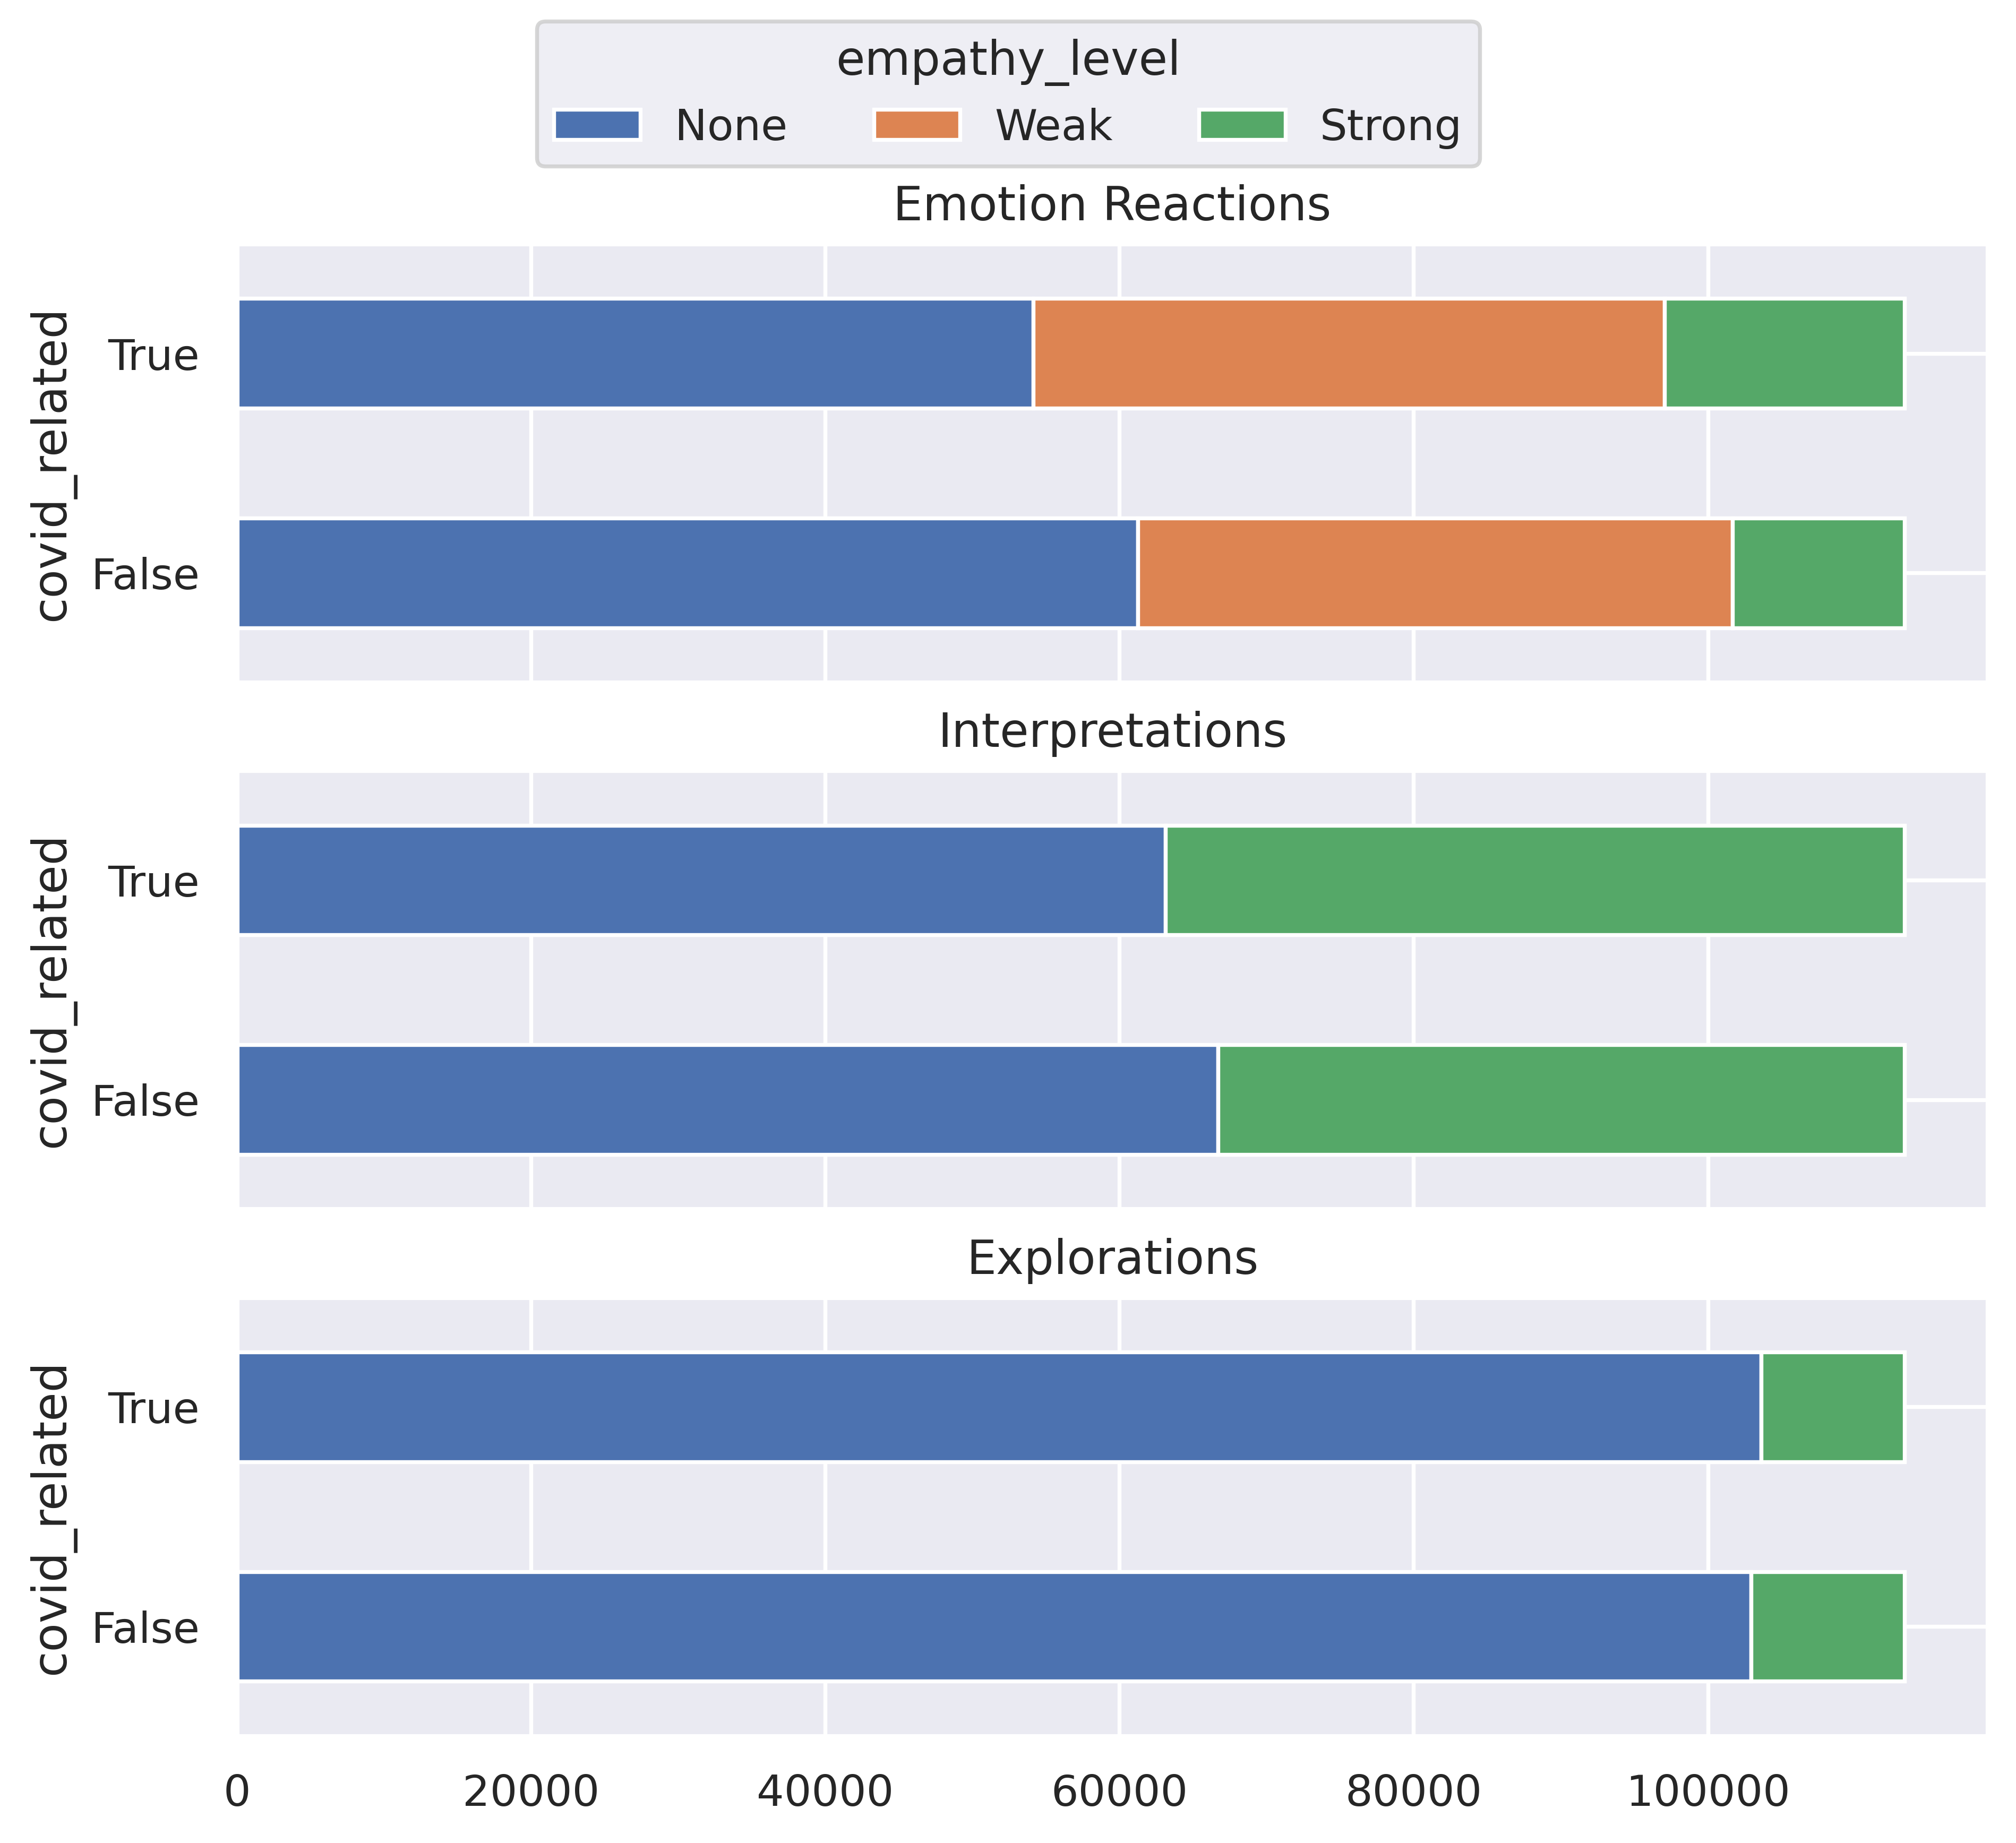

In [ ]:
# plt.style.use("default")
fig, axes = plt.subplots(3, 1, figsize=(8, 7), dpi=532, sharex=True, sharey=True)
tmp_df[tmp_df['empathy_type']=="ER_label"].plot(x = 'covid_related', kind = 'barh', stacked = True, mark_right = True, ax=axes[0], legend=False, title="Emotion Reactions")
tmp_df[tmp_df['empathy_type']=="IP_label"].plot(x = 'covid_related', kind = 'barh', stacked = True, mark_right = True, ax=axes[1], legend=False, title="Interpretations")
tmp_df[tmp_df['empathy_type']=="EX_label"].plot(x = 'covid_related', kind = 'barh', stacked = True, mark_right = True, ax=axes[2], legend=False, title="Explorations")
fig.legend(title="empathy_level", labels=["None", "Weak", "Strong"], loc="upper center", ncol=3)

In [ ]:
fig.savefig('dist.pdf')

In [ ]:
df.describe()

ER_label       IP_label       EX_label       sp_score  \
count  226762.000000  226762.000000  226762.000000  226762.000000   
mean        0.614711       0.854605       0.178002     966.537303   
std         0.695658       0.989376       0.569491    3053.566491   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       3.000000   
50%         0.000000       0.000000       0.000000      14.000000   
75%         1.000000       2.000000       0.000000     214.000000   
max         2.000000       2.000000       2.000000   35338.000000   

       sp_num_comments       rp_score  rp_controversiality  
count    226762.000000  226762.000000        226762.000000  
mean         82.362433       4.925473             0.006169  
std         267.451230      46.715645             0.078303  
min           0.000000    -113.000000             0.000000  
25%           3.000000       1.000000             0.000000  
50%           9.000000       2.000000             0.000000  
75%          43.000000       3.000000             0.000000  
max        4183.000000    3993.000000             1.000000

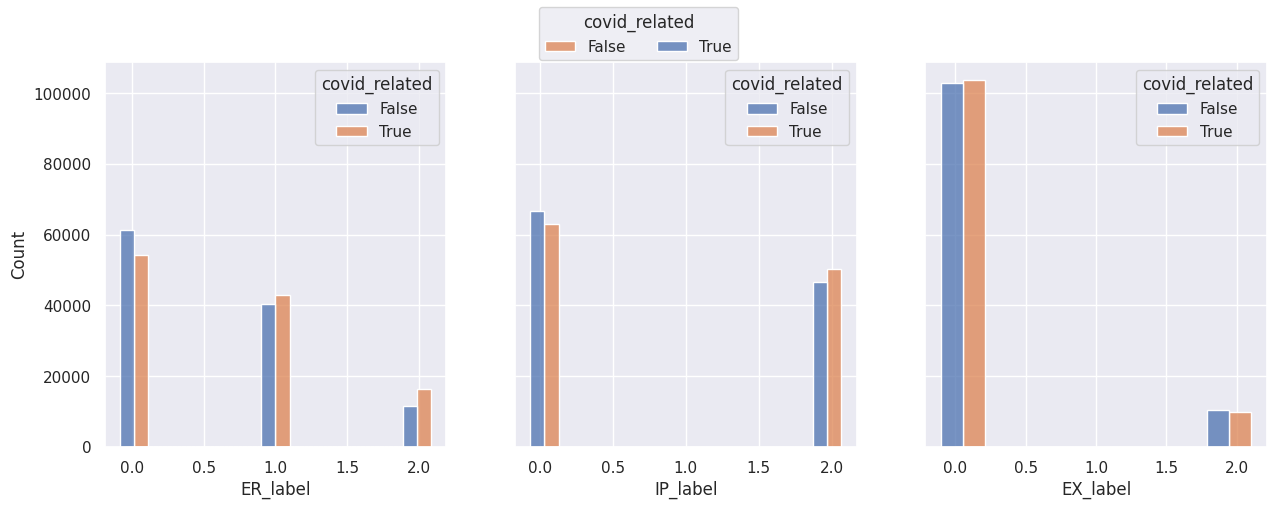

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
sns.histplot(data=df, x="ER_label", hue="covid_related", multiple="dodge", shrink=6, ax=axes[0])
sns.histplot(data=df, x="IP_label", hue="covid_related", multiple="dodge", shrink=3, ax=axes[1])
sns.histplot(data=df, x="EX_label", hue="covid_related", multiple="dodge", shrink=3, ax=axes[2])

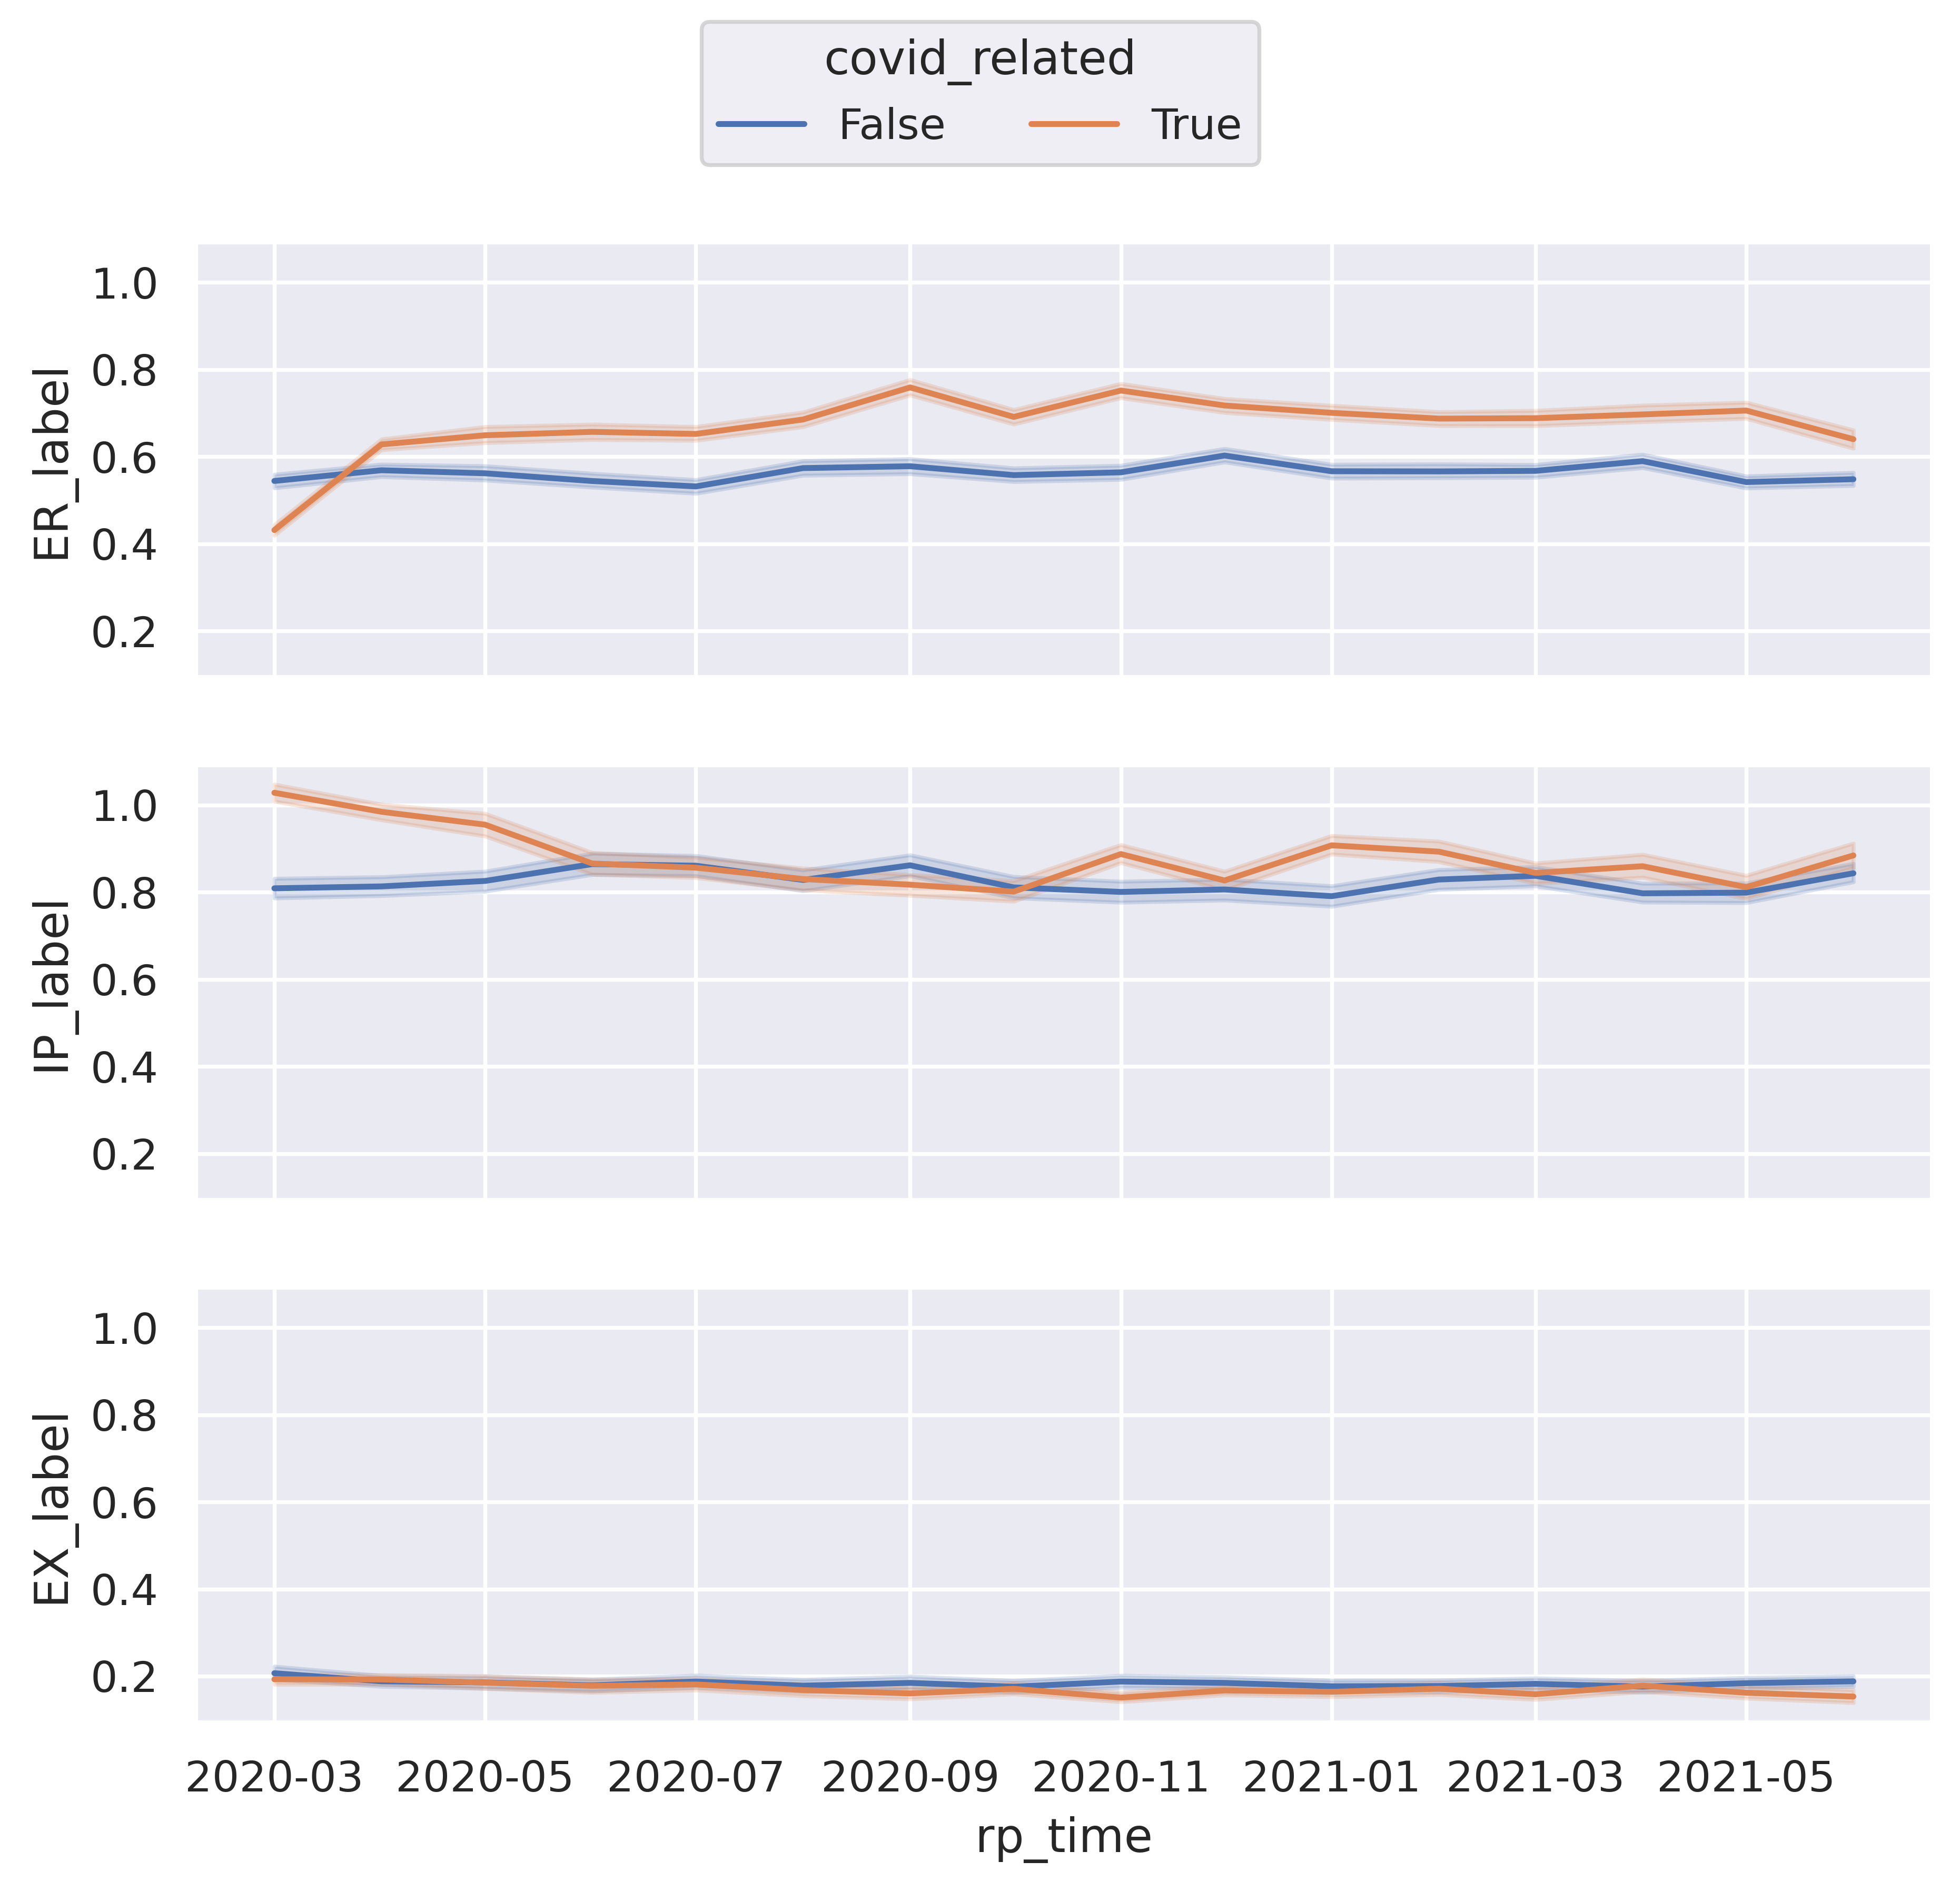

In [ ]:
# g = sns.FacetGrid(df, col="")
# g.map(sns.histplot, "tip")
# plt.rcParams.update({'font.size': 22})

fig, axes = plt.subplots(3, 1, figsize=(8,7), dpi=532, sharex=True, sharey=True)
sns.lineplot(data=df, x="rp_time", y="ER_label", hue="covid_related", ax=axes[0], legend=False)
sns.lineplot(data=df, x="rp_time", y="IP_label", hue="covid_related", ax=axes[1], legend=False)
sns.lineplot(data=df, x="rp_time", y="EX_label", hue="covid_related", ax=axes[2], legend=False)
fig.legend(title="covid_related", labels=["False", "True"], loc="upper center", ncol=2)

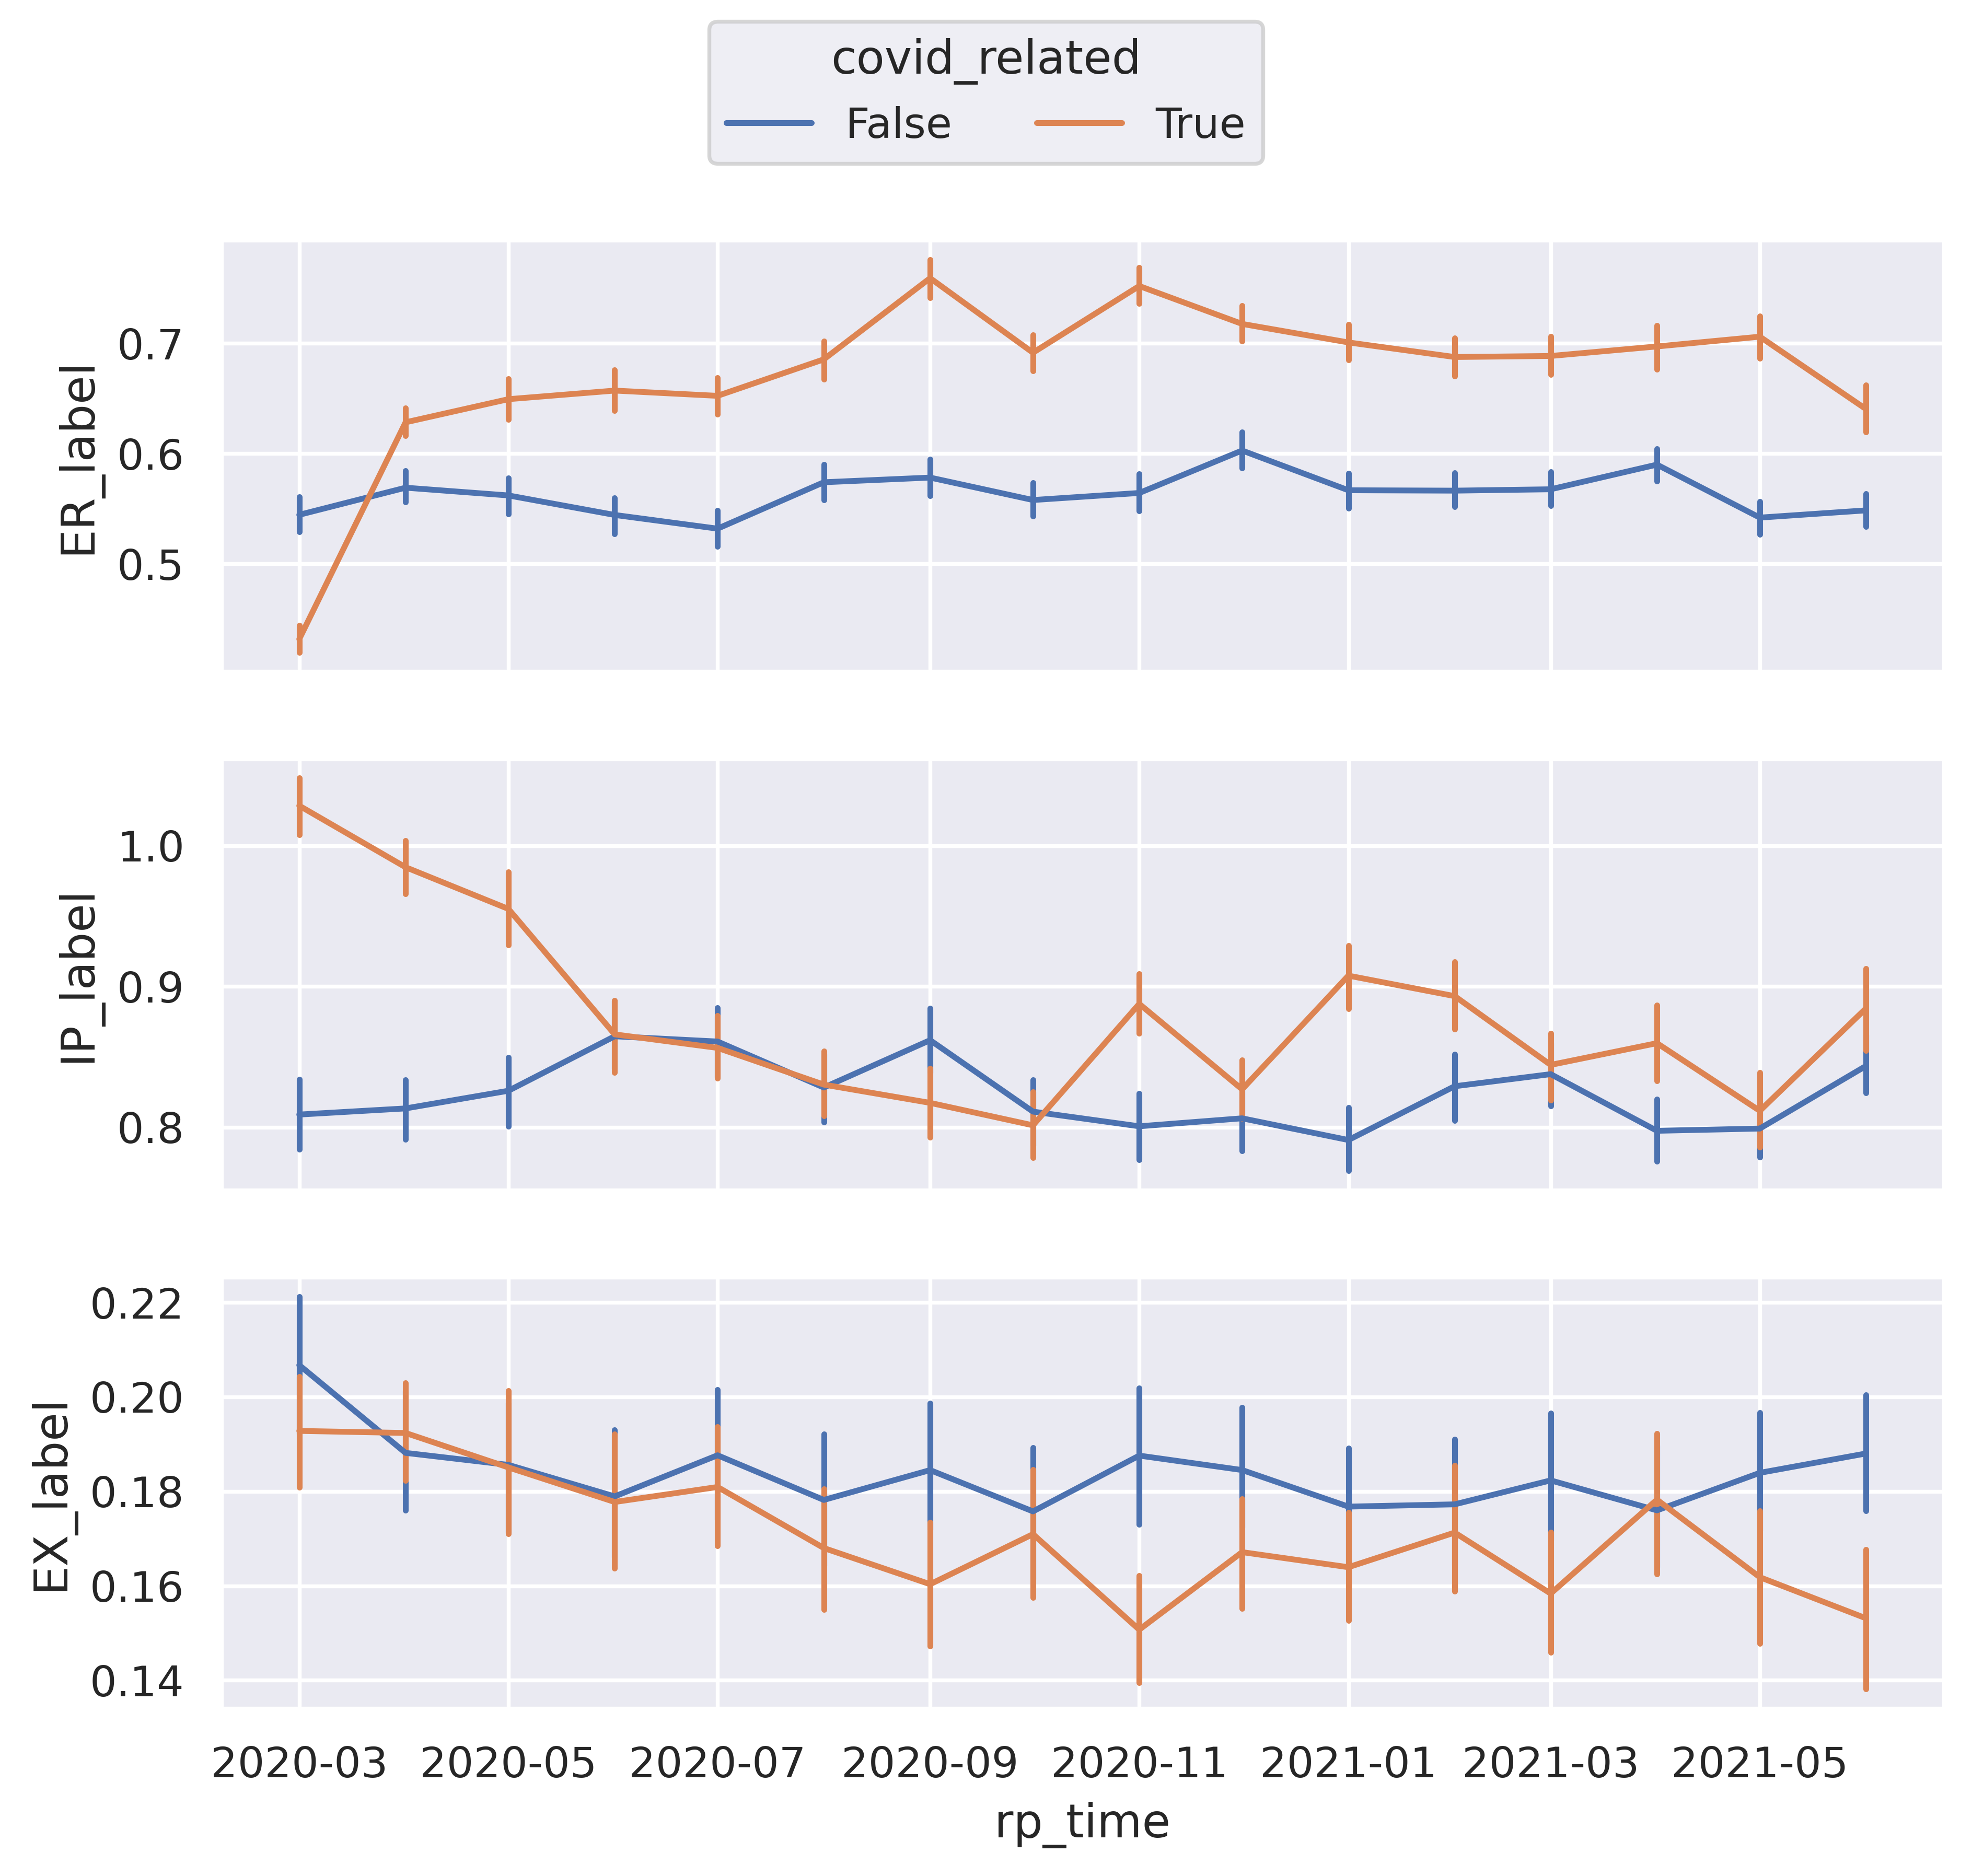

In [ ]:
# g = sns.FacetGrid(df, col="")
# g.map(sns.histplot, "tip")
# plt.rcParams.update({'font.size': 22})

fig, axes = plt.subplots(3, 1, figsize=(8,7), dpi=532, sharex=True)
sns.lineplot(data=df, x="rp_time", y="ER_label", hue="covid_related", ax=axes[0], legend=False, err_style="bars")
sns.lineplot(data=df, x="rp_time", y="IP_label", hue="covid_related", ax=axes[1], legend=False, err_style="bars")
sns.lineplot(data=df, x="rp_time", y="EX_label", hue="covid_related", ax=axes[2], legend=False, err_style="bars")
fig.legend(title="covid_related", labels=["False", "True"], loc="upper center", ncol=2)

In [ ]:
fig.savefig('time_var.pdf')

In [ ]:
df[['subreddit', 'sp_id', 'rp_id', 'sp_author_id', 'rp_author_id']].groupby("subreddit").nunique()

sp_id  rp_id  sp_author_id  rp_author_id
subreddit                                                   
GriefSupport         5831  13670          4596          6074
MMFB                  970   2016           777          1153
SuicideBereavement   1078   2250           733          1078
SuicideWatch        15902  24810         12721         14417
depressed            2176   3618          1821          2445
depression          23606  40354         19188         23790
getting_over_it       469    876           354           546
helpmecope            378    592           330           348
lonely               9597  20328          7351         12166
mentalhealth        16076  27590         13321         13455
offmychest          33705  83630         28068         48404
therapy              3994   7028          3464          3727

In [ ]:
empathy_df

rp_id    rp_time  covid_related empathy_type  empathy_level
0       gyvzhu5 2021-05-01           True     ER_label              1
1       ft9f1vl 2020-06-01          False     ER_label              2
2       flj6ik8 2020-03-01          False     ER_label              0
3       frtmrd2 2020-05-01          False     ER_label              0
4       gw3iy9r 2021-04-01          False     ER_label              2
...         ...        ...            ...          ...            ...
680281  flqkpe3 2020-03-01          False     EX_label              0
680282  g8c6me4 2020-10-01          False     EX_label              0
680283  fpbyo66 2020-05-01           True     EX_label              0
680284  gt8wf0u 2021-04-01          False     EX_label              0
680285  fyzm293 2020-07-01           True     EX_label              0

[680286 rows x 5 columns]

In [ ]:
'getting_over_it', 'GriefSupport', 'helpmecope', HereToHelp, r/itgetsbetter, r/LostALovedOne, r/MMFB, r/SuicideBereavement, r/therapy

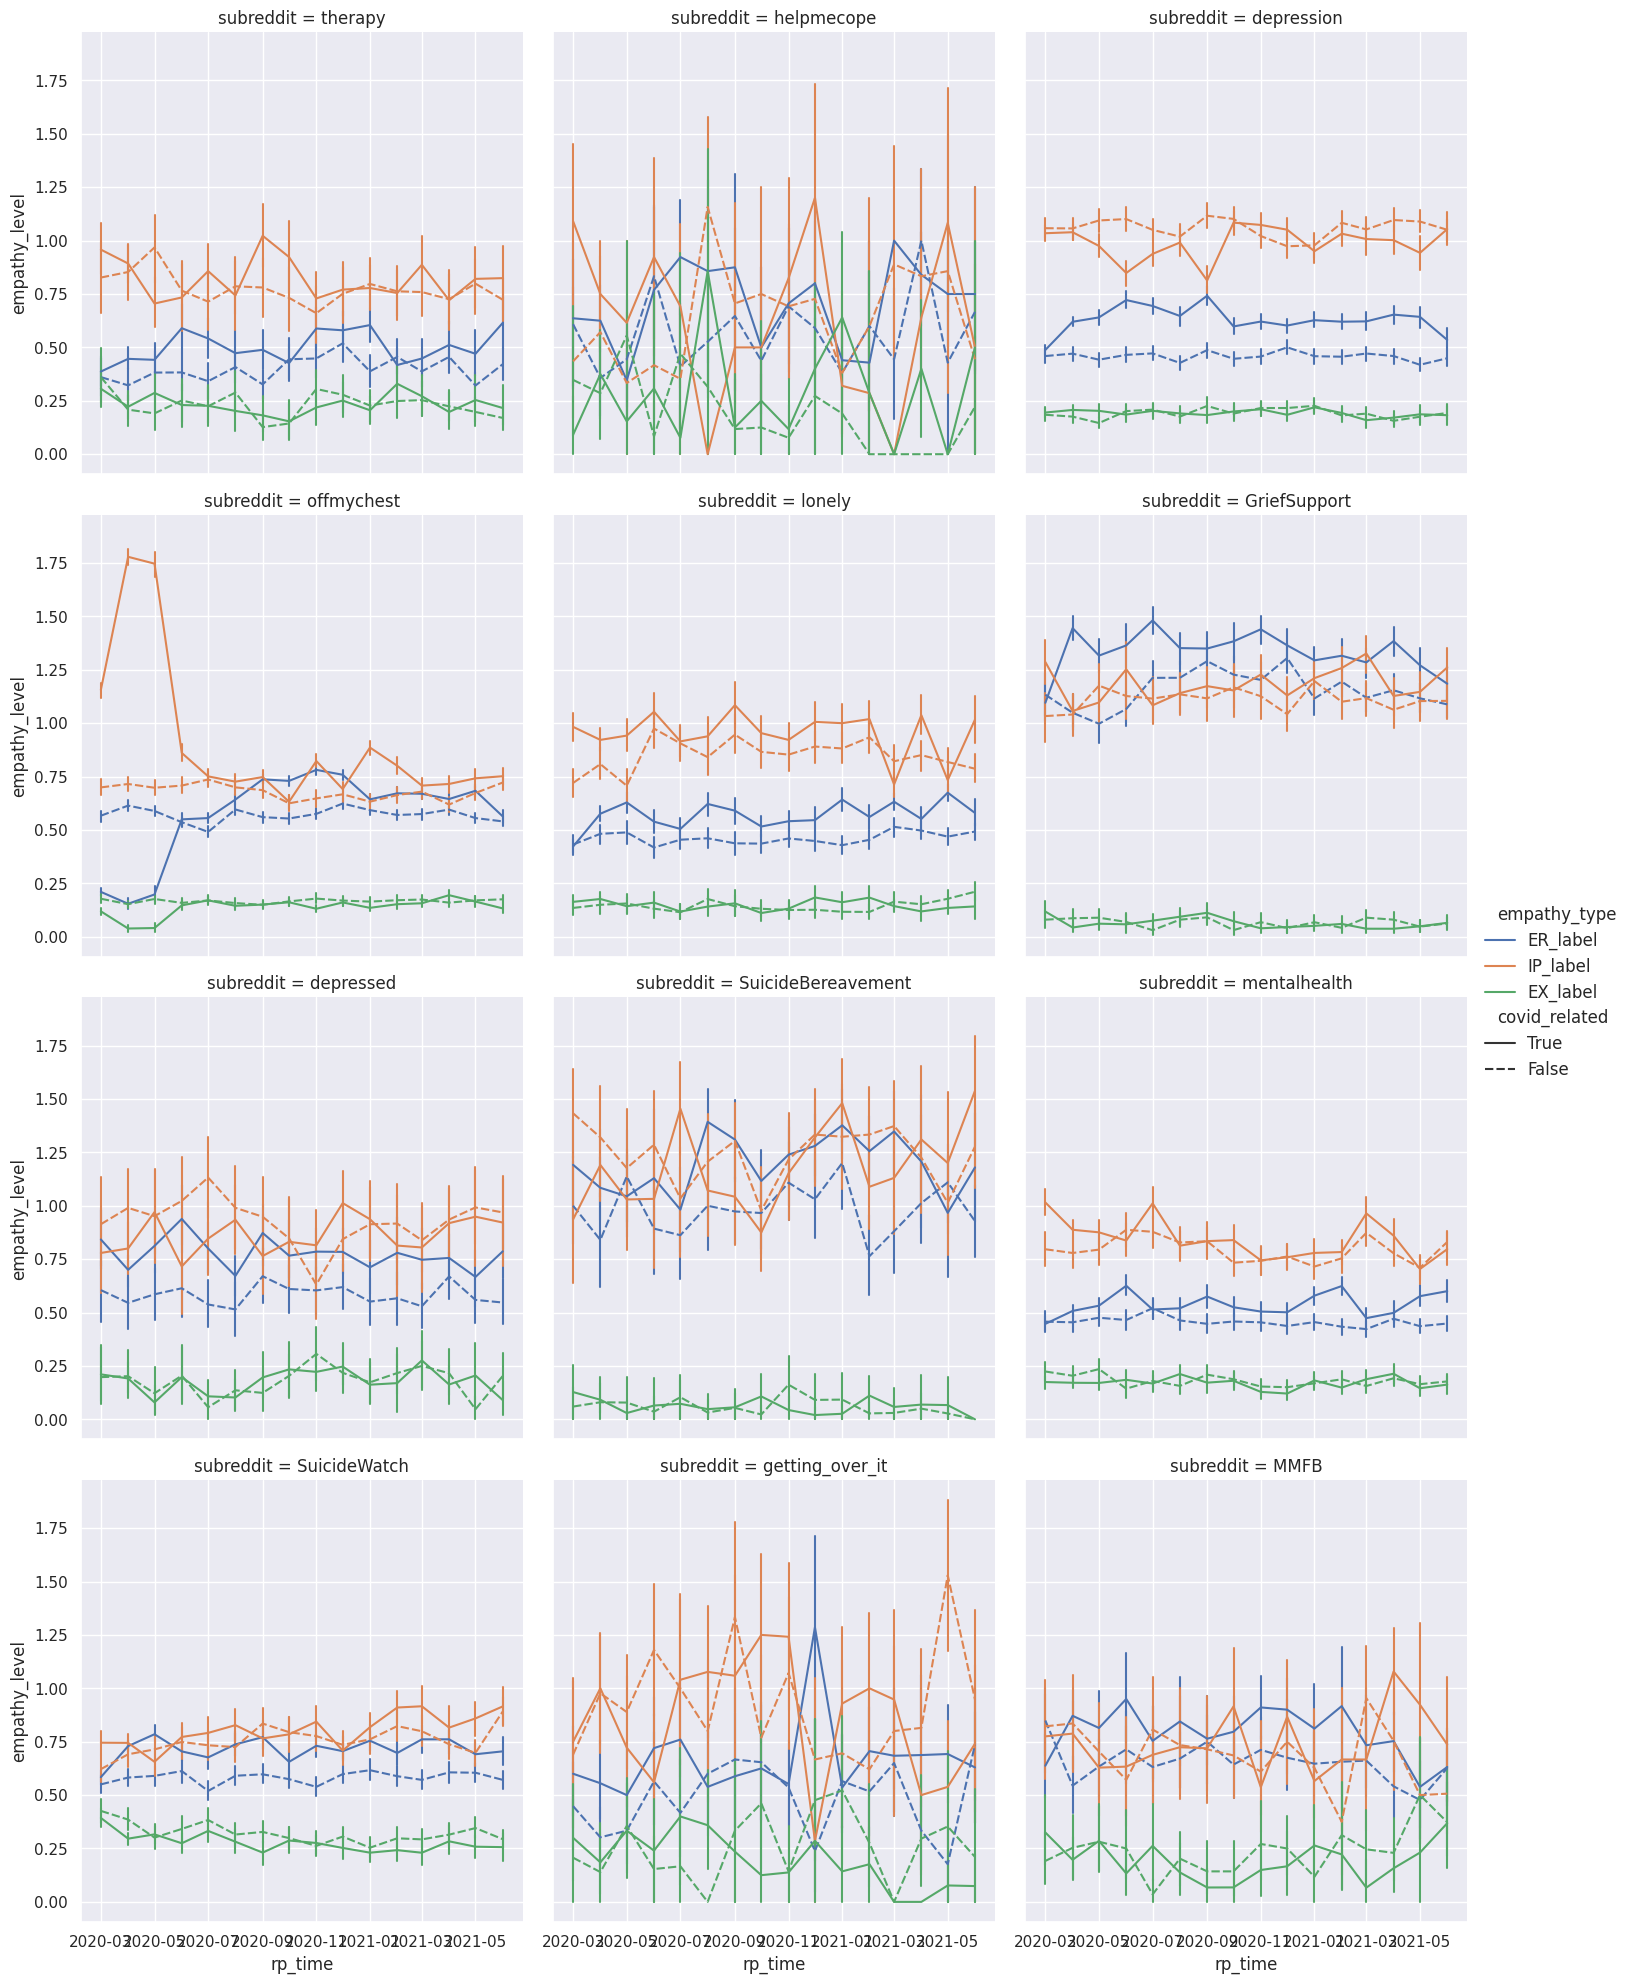

In [ ]:
sns.set(rc={"figure.dpi":100, 'savefig.dpi':100})
ax = sns.relplot(data=empathy_df, x="rp_time", y="empathy_level", style="covid_related", hue="empathy_type", col="subreddit", col_wrap=3, kind="line", err_style="bars", style_order=[True, False])

In [ ]:
empathy_df

rp_id    rp_time  covid_related   subreddit empathy_type  \
0       gyvzhu5 2021-05-01           True     therapy     ER_label   
1       ft9f1vl 2020-06-01          False  helpmecope     ER_label   
2       flj6ik8 2020-03-01          False  depression     ER_label   
3       frtmrd2 2020-05-01          False  depression     ER_label   
4       gw3iy9r 2021-04-01          False  offmychest     ER_label   
...         ...        ...            ...         ...          ...   
680281  flqkpe3 2020-03-01          False  depression     EX_label   
680282  g8c6me4 2020-10-01          False  depression     EX_label   
680283  fpbyo66 2020-05-01           True  depression     EX_label   
680284  gt8wf0u 2021-04-01          False  offmychest     EX_label   
680285  fyzm293 2020-07-01           True  depression     EX_label   

        empathy_level  
0                   1  
1                   2  
2                   0  
3                   0  
4                   2  
...               ...  
680281              0  
680282              0  
680283              0  
680284              0  
680285              0  

[680286 rows x 6 columns]

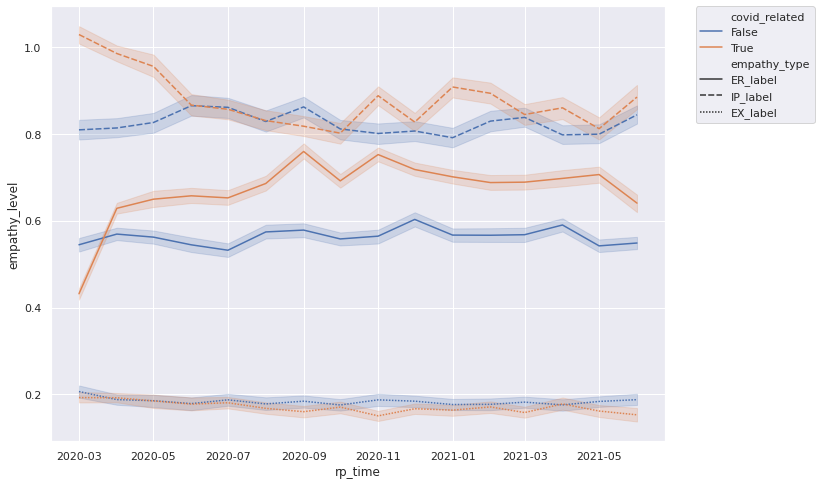

In [ ]:
# sns.set(rc={"figure.dpi":100, 'savefig.dpi':100})
sns.set(rc = {'figure.figsize':(11,8)})
ax = sns.lineplot(data=empathy_df, x="rp_time", y="empathy_level", style="empathy_type", hue="covid_related")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [ ]:
ax.savefig("subreddit.pdf")

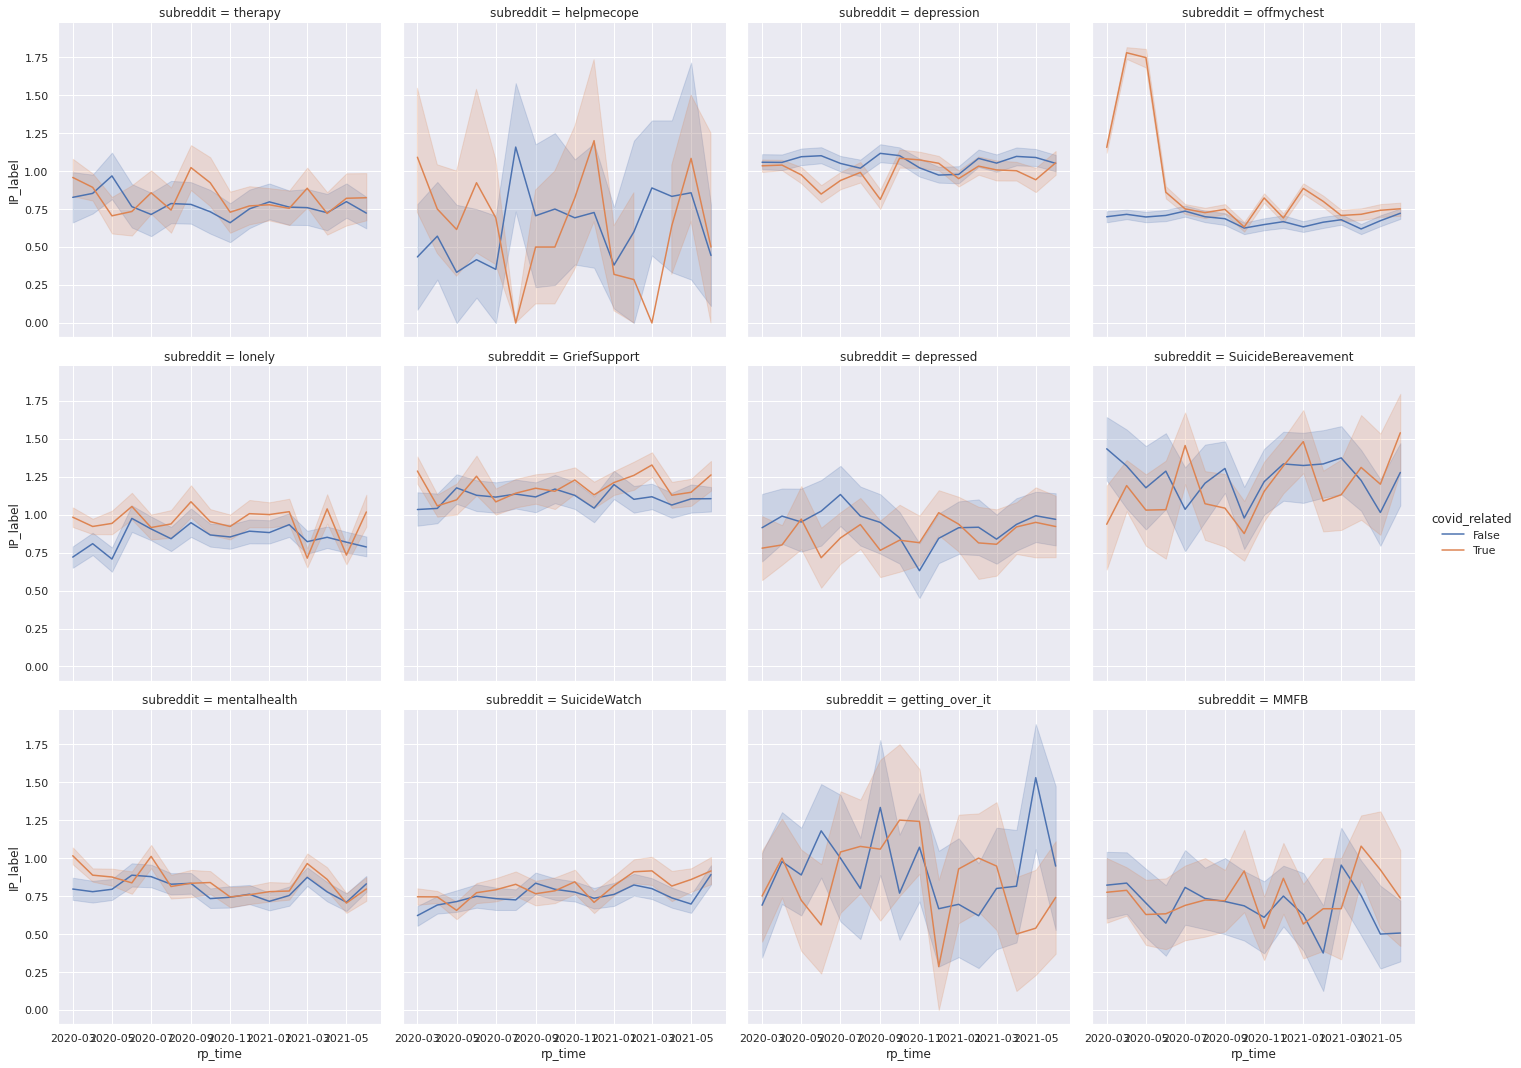

In [ ]:
sns.relplot(data=df, x="rp_time", y="IP_label", hue="covid_related", col="subreddit", col_wrap=4, kind="line")

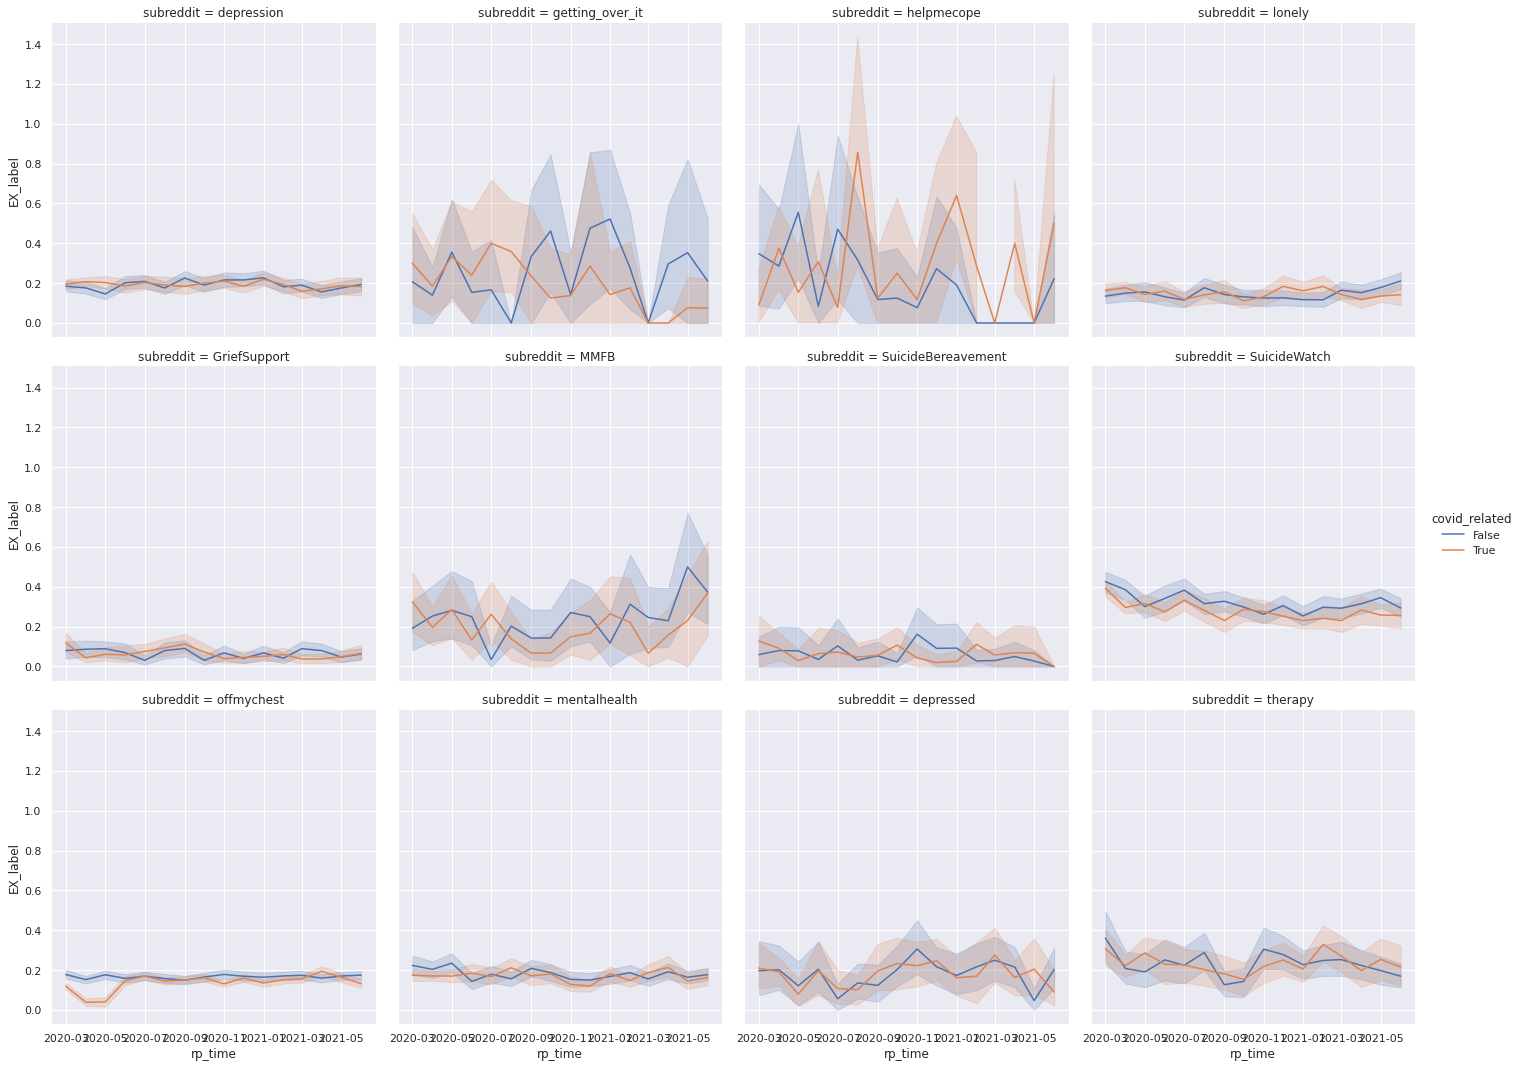

In [ ]:

sns.relplot(data=df, x="rp_time", y="EX_label", hue="covid_related", col="subreddit", col_wrap=4, kind="line")

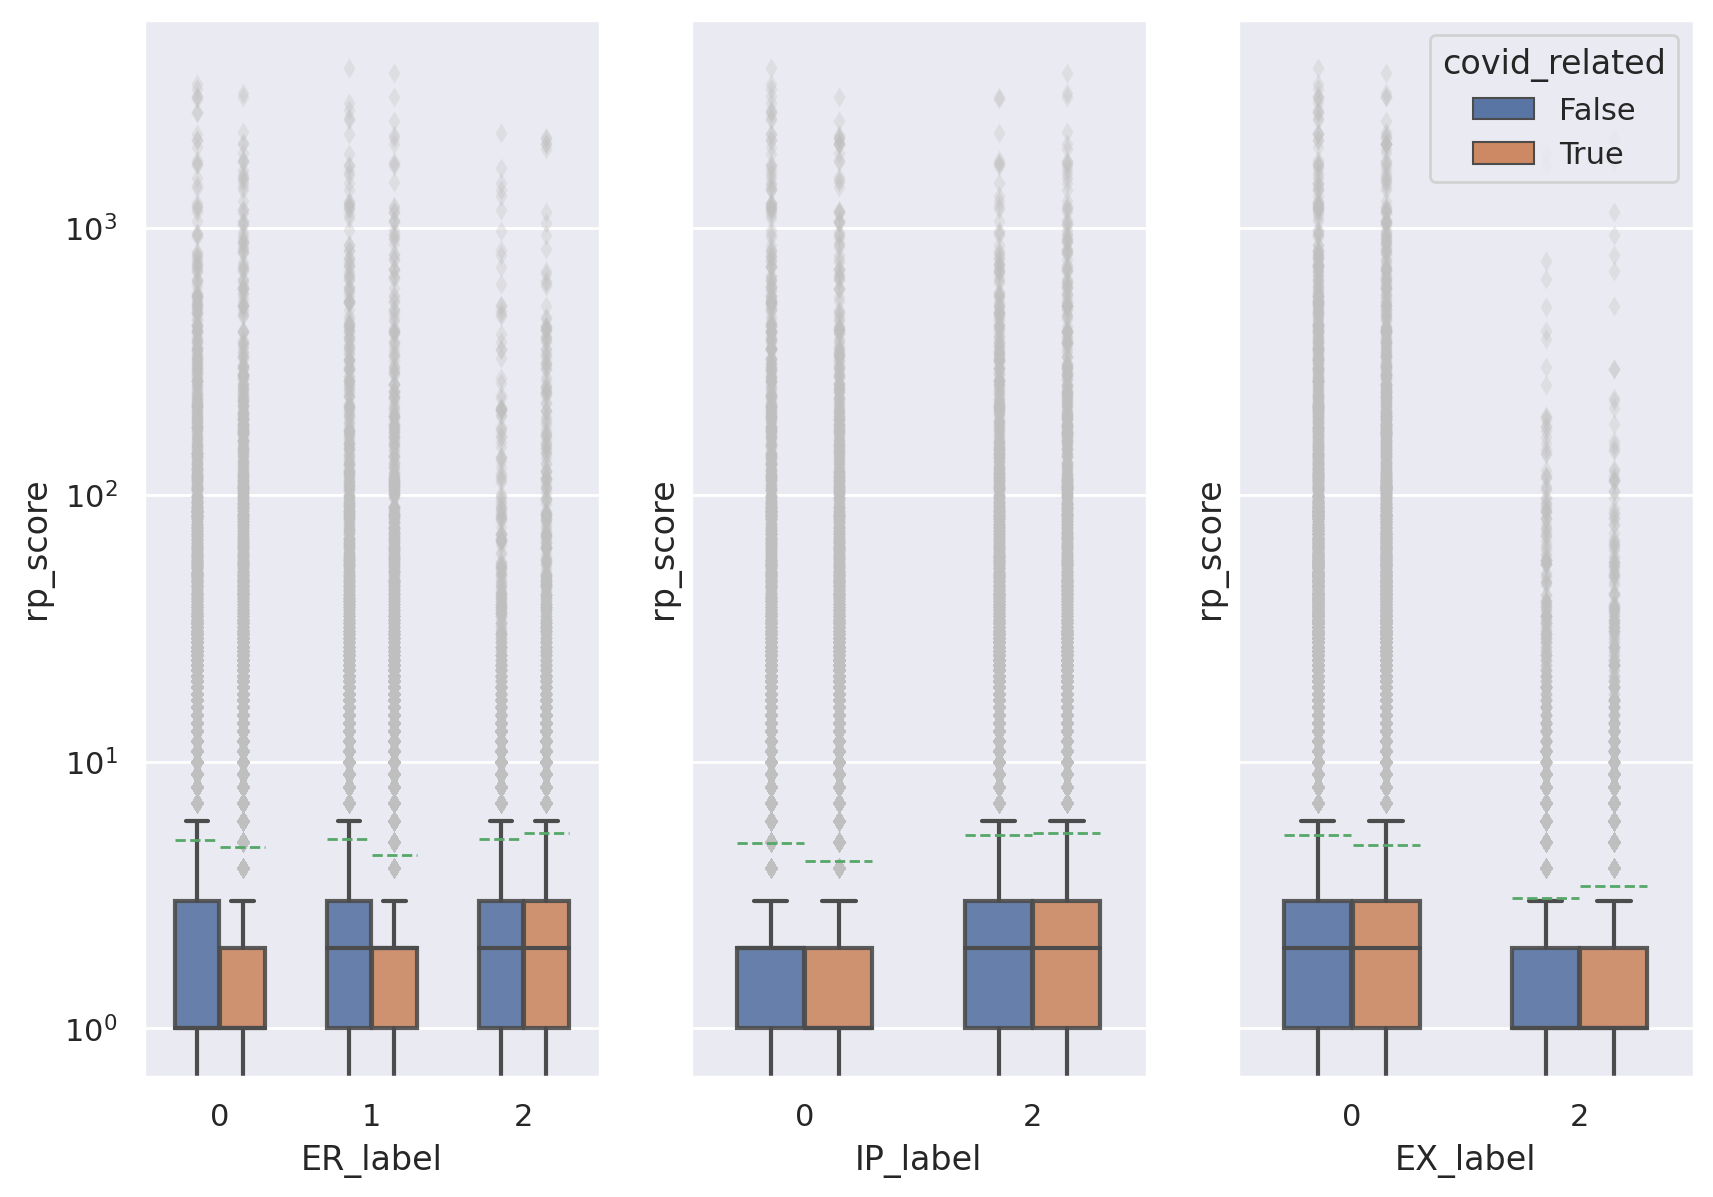

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(10,7), dpi=200, sharey=True)
flierprops = dict(markerfacecolor='0.75', markersize=5,
              linestyle='none',  markeredgecolor='none', alpha=.3)
boxprops = dict(alpha=.9)
plt.legend([],[], frameon=False)
sns.boxplot(x="ER_label", y="rp_score", data=df, showmeans=True, meanline=True, width=.6, boxprops=boxprops, flierprops=flierprops, hue='covid_related', ax=axes[0]).set_yscale("log")
sns.boxplot(x="IP_label", y="rp_score", data=df, showmeans=True, meanline=True, width=.6, boxprops=boxprops, flierprops=flierprops, hue='covid_related', ax=axes[1]).set_yscale("log")
sns.boxplot(x="EX_label", y="rp_score", data=df, showmeans=True, meanline=True, width=.6, boxprops=boxprops, flierprops=flierprops, hue='covid_related', ax=axes[2]).set_yscale("log")
axes[0].legend_.remove()
axes[1].legend_.remove()

In [ ]:
fig.savefig("corr.pdf")

In [ ]:
df[['ER_label', 'rp_score', 'covid_related']].groupby(['ER_label', 'covid_related']).describe()

rp_score                                             \
                          count      mean        std    min  25%  50%  75%   
ER_label covid_related                                                       
0        False          61237.0  5.066349  48.739882  -87.0  1.0  1.0  3.0   
         True           54148.0  4.796244  44.000532 -113.0  1.0  1.0  2.0   
1        False          40452.0  5.140487  50.896624  -47.0  1.0  2.0  3.0   
         True           42909.0  4.449043  44.365753  -44.0  1.0  2.0  2.0   
2        False          11692.0  5.148478  42.849353  -16.0  1.0  2.0  3.0   
         True           16324.0  5.385445  45.534153  -91.0  1.0  2.0  3.0   

                                
                           max  
ER_label covid_related          
0        False          3474.0  
         True           3212.0  
1        False          3993.0  
         True           3822.0  
2        False          2275.0  
         True           2198.0

In [ ]:
newcomer_df = pd.read_csv("/content/drive/MyDrive/CSS_Results/newcomer.csv")

In [ ]:
newcomer_df

rp_id   sp_id     subreddit  covid_related  \
0      fo8x3wv  g68q8w       therapy           True   
1      fmrpqce  fwz7pg    offmychest          False   
2      fnyymdp  g4nym2        lonely          False   
3      fmrjn4c  fwx5gm     depressed          False   
4      fmm49a6  fvx9jp    depression          False   
...        ...     ...           ...            ...   
18089  g5xp0f4  iw7efv    depression          False   
18090  g6y1ioe  j1158l    depression          False   
18091  g70uewn  j1ogov    offmychest           True   
18092  g5iv5ej  iu6f1r  mentalhealth          False   
18093  g4q51gv  iq6pbe  GriefSupport           True   

                                                sp_title  \
0                                           Teletherapy?   
1      When life hits, it hits hard: Evacuating campu...   
2                          i wish someone cared about me   
3                                  I'm hopelessly stupid   
4                                        Am I depressed?   
...                                                  ...   
18089       How to Help/Talk to someone you barely know?   
18090                        no identity, no personality   
18091                                    A COVID goodbye   
18092  There should be a psychiatrist instead of a sc...   
18093              Soooo is it normal to feel like this.   

                                                 sp_text  \
0      Early last month my in-person therapy sessions...   
1      My college campus was evacuated and I had to m...   
2      about how i feel, what i like or dont, i'd lik...   
3      So I've been dealing with depression and anxie...   
4      I've been feeling... wrong for about 3 years. ...   
...                                                  ...   
18089  Hi everyone,\n\nI'm not sure if this is the ri...   
18090  Does anybody else feel like they 'are just the...   
18091  Today my grandfather had 30 minutes to say goo...   
18092  I am a teen and the school councillor I talked...   
18093  Last April my father was diagnosed with cancer...   

                                                 rp_text  ER_label  IP_label  \
0      I though I was going to haaaate it, but honest...         0         2   
1      Hey, i’m sorry you’re going through all of thi...         2         0   
2      Sorry for you, you are not alone Im the same as u         2         0   
3      I'm going through the same problem. (27M) I kn...         1         2   
4                        Yep sounds like depression imo.         0         0   
...                                                  ...       ...       ...   
18089  I think you should reach out to him. I’d be sh...         1         0   
18090  ye i can really relate to this.i usually chang...         1         2   
18091                                      I’m so sorry.         2         0   
18092  Psychiatrists talk less, they’re just there to...         0         0   
18093  Yes, it's normal. It's important to think abou...         1         0   

       EX_label  ...  rp_score  rp_controversiality    sp_time    rp_time  \
0             0  ...         3                    0  Apr, 2020  Apr, 2020   
1             0  ...         2                    0  Apr, 2020  Apr, 2020   
2             0  ...         1                    0  Apr, 2020  Apr, 2020   
3             0  ...         1                    0  Apr, 2020  Apr, 2020   
4             0  ...         1                    0  Apr, 2020  Apr, 2020   
...         ...  ...       ...                  ...        ...        ...   
18089         0  ...         1                    0  Sep, 2020  Sep, 2020   
18090         0  ...         1                    0  Sep, 2020  Sep, 2020   
18091         0  ...         3                    0  Sep, 2020  Sep, 2020   
18092         2  ...        26                    0  Sep, 2020  Sep, 2020   
18093         0  ...         3                    0  Sep, 2020  Sep, 2020   

                 sp_

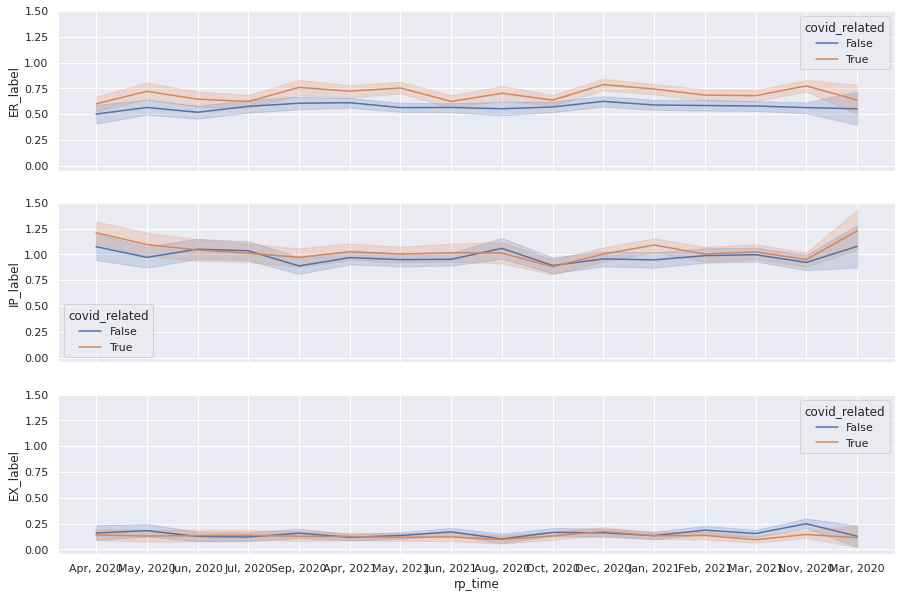

In [ ]:
# g = sns.FacetGrid(df, col="")
# g.map(sns.histplot, "tip")

fig, axes = plt.subplots(3, 1, figsize=(15,10), sharey=True, sharex=True)
sns.lineplot(data=newcomer_df, x="rp_time", y="ER_label", hue="covid_related", ax=axes[0])
sns.lineplot(data=newcomer_df, x="rp_time", y="IP_label", hue="covid_related", ax=axes[1])
sns.lineplot(data=newcomer_df, x="rp_time", y="EX_label", hue="covid_related", ax=axes[2])